In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
nbaplayers = pd.read_csv('Cleaned_Capstone_II_Dataset.csv', index_col=0) #Getting rid of the unnamed column

In [3]:
print(nbaplayers.head())

              Player Team  Age  Height(Inches)  Weight(Pounds)  \
0      Dennis Rodman  CHI   36            78.0           220.0   
1  Dwayne Schintzius  LAC   28            85.0           260.0   
2       Earl Cureton  TOR   39            81.0           210.0   
3        Ed O'Bannon  DAL   24            80.0           222.0   
4        Ed Pinckney  MIA   34            81.0           240.0   

                       College Country Draft Year Draft Round Draft Number  \
0  Southeastern Oklahoma State     USA       1986           2           27   
1                      Florida     USA       1990           1           24   
2                Detroit Mercy     USA       1979           3           58   
3                         UCLA     USA       1995           1            9   
4                    Villanova     USA       1985           1           10   

   ...  PPG   RPG  APG  Net Rating  Offensive Rebound %  Defensive Rebound %  \
0  ...  5.7  16.1  3.1        16.1                0.18

<AxesSubplot:title={'center':'NBA Players Line Plot'}, xlabel='Player Entries', ylabel='Variables'>

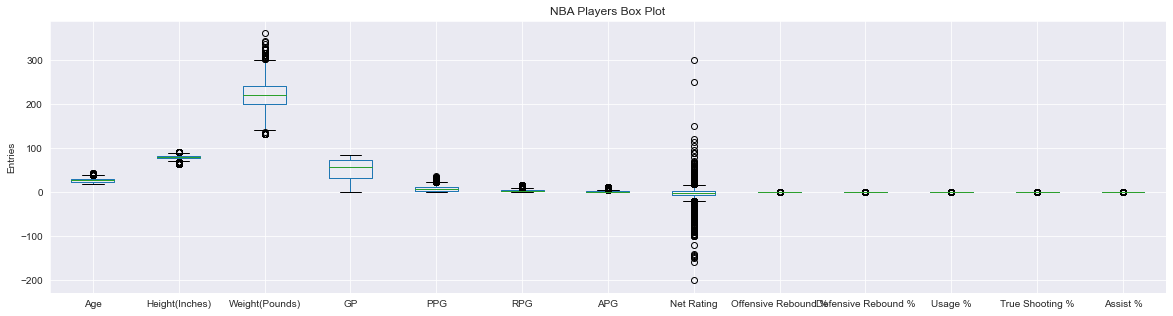

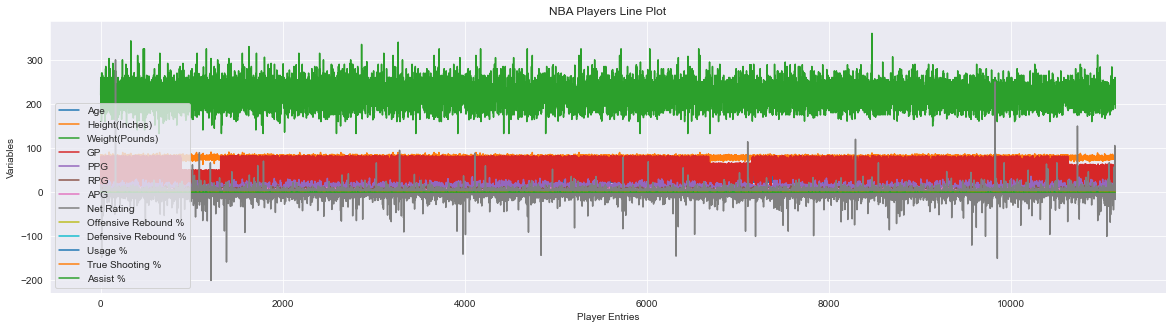

In [4]:
nbaplayers.plot(kind='box', title="NBA Players Box Plot",ylabel='Entries', xlabel='Variables') 
nbaplayers.plot(kind='line', title="NBA Players Line Plot", xlabel='Player Entries',ylabel='Variables') 
#Creating box and line plots to look at data set. 
#Net Rating, Height(Inches), and Weight(Pounds) have the larger IQR ranges.


<ipython-input-5-b9e6cbc90075>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  nbaheatmap = sns.heatmap(corrdata, annot=True).set(Title='NBA Players Correlation Matrix')


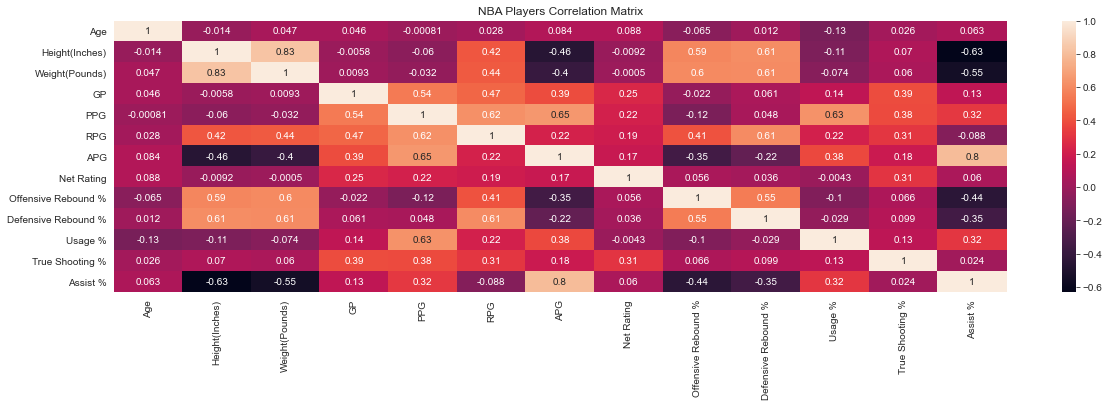

In [5]:
corrdata = nbaplayers.corr()

nbaheatmap = sns.heatmap(corrdata, annot=True).set(Title='NBA Players Correlation Matrix')
#Define a decline in performance, what are changes in the other variable
#Running a correlation matrix to view the correlation of variables

In [6]:
#After looking at the correlation, there is a strong relationship between height and weight, assists and assist %,
#APG and assist %, and a minimal correlation between APG and PPG


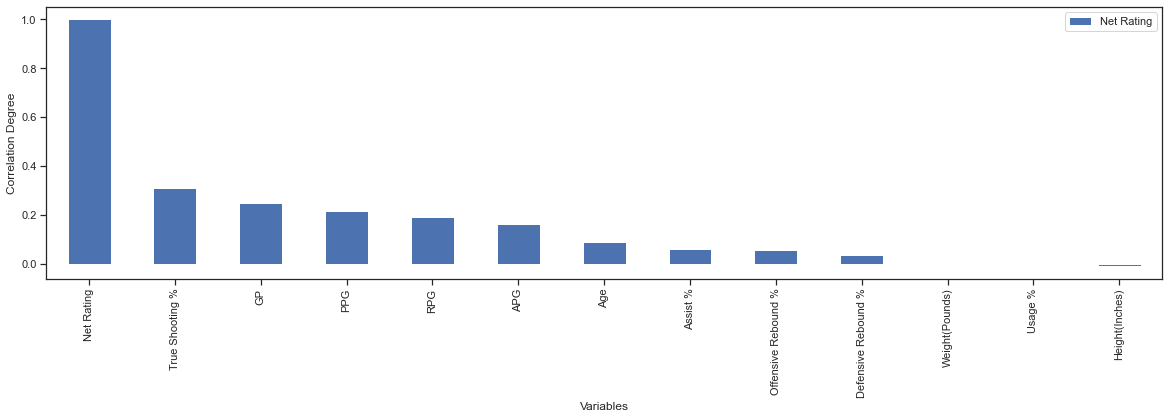

In [72]:
corrdatasort = corrdata.sort_values('Net Rating', ascending = False)

corrdatasort[['Net Rating']].plot(kind='bar', xlabel='Variables', ylabel='Correlation Degree')

plt.show() #Plotting the variables associated with age in descending order

In [8]:
#When Descending the correlated variables, Net Rating, APG, Offensive Rebound % and Usage % look to be the most related
#When looking at the other the graphs versus age,when Net Rating, APG, Offensive Reboud % and Usage % decline, they almost always continue to decline

In [9]:
Q1 = nbaplayers.quantile(0.25)
Q3 = nbaplayers.quantile(0.75)

IQR = Q3 - Q1

print(IQR) #Creating Quartiles

Age                     6.000
Height(Inches)          5.000
Weight(Pounds)         41.000
GP                     42.000
PPG                     8.000
RPG                     2.900
APG                     1.800
Net Rating              9.500
Offensive Rebound %     0.064
Defensive Rebound %     0.086
Usage %                 0.068
True Shooting %         0.079
Assist %                0.113
dtype: float64


In [10]:
# The IQR indicates large ranges for GP, Weight, Net Rating, and PPG, Net Rating is the largest

In [68]:
nbaplayersnonet = nbaplayers.drop(['Net Rating'], axis = 1)

Q1nonet = nbaplayersnonet.quantile(0.25)
Q3nonet = nbaplayersnonet.quantile(0.75)

IQRnonet = Q3nonet - Q1nonet

print(IQRnonet) #Creating Quartiles without net rating

Age                     6.000
Height(Inches)          5.000
Weight(Pounds)         41.000
GP                     42.000
PPG                     8.000
RPG                     2.900
APG                     1.800
Offensive Rebound %     0.064
Defensive Rebound %     0.086
Usage %                 0.068
True Shooting %         0.079
Assist %                0.113
dtype: float64


In [69]:
Lower_Rangenonet = Q1nonet - (1.5 * IQRnonet)
Upper_Rangenonet = Q3nonet + (1.5 * IQRnonet)

outliersnonet = nbaplayersnonet[((nbaplayersnonet < Lower_Rangenonet) | ((nbaplayersnonet > Upper_Rangenonet))).any(axis=1)]

Percentage_Outliersnonet = 1 - (len(outliersnonet)/len(nbaplayersnonet))

print(Percentage_Outliersnonet)

0.8042171377299238


In [12]:
#If outliers are removed, about 78% of the original dataset will remain

<AxesSubplot:title={'center':'No Outliers'}>

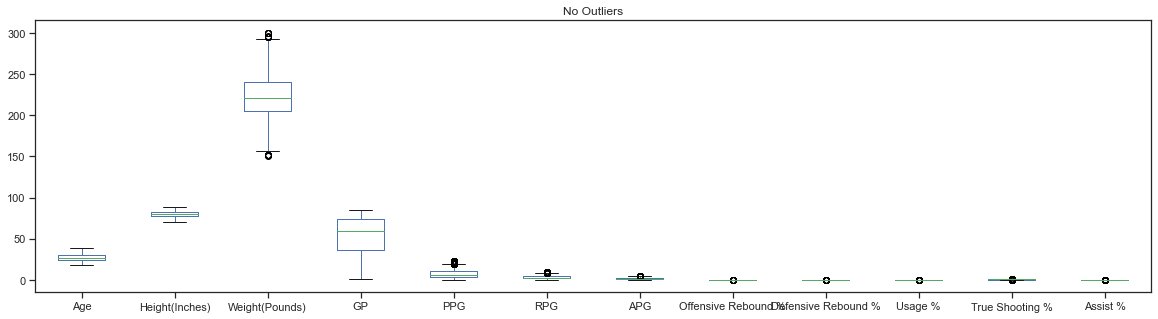

In [70]:
no_outliers = nbaplayersnonet[ ~ ( ((nbaplayersnonet < Lower_Rangenonet) | ((nbaplayersnonet > Upper_Rangenonet))).any(axis=1) ) ]

no_outliers.plot(kind='box', title='No Outliers')

In [14]:
#Elimintating outliers reduces the ranges of many variables

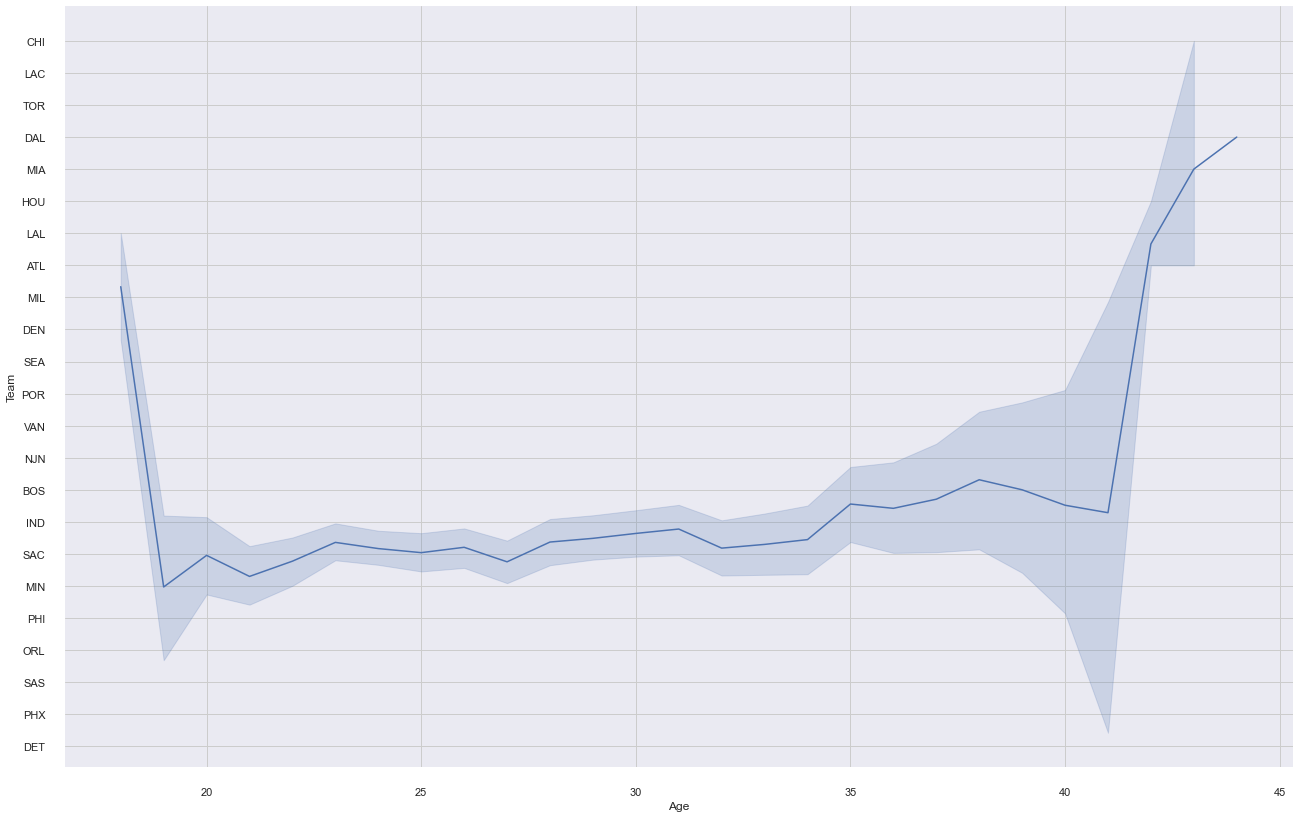

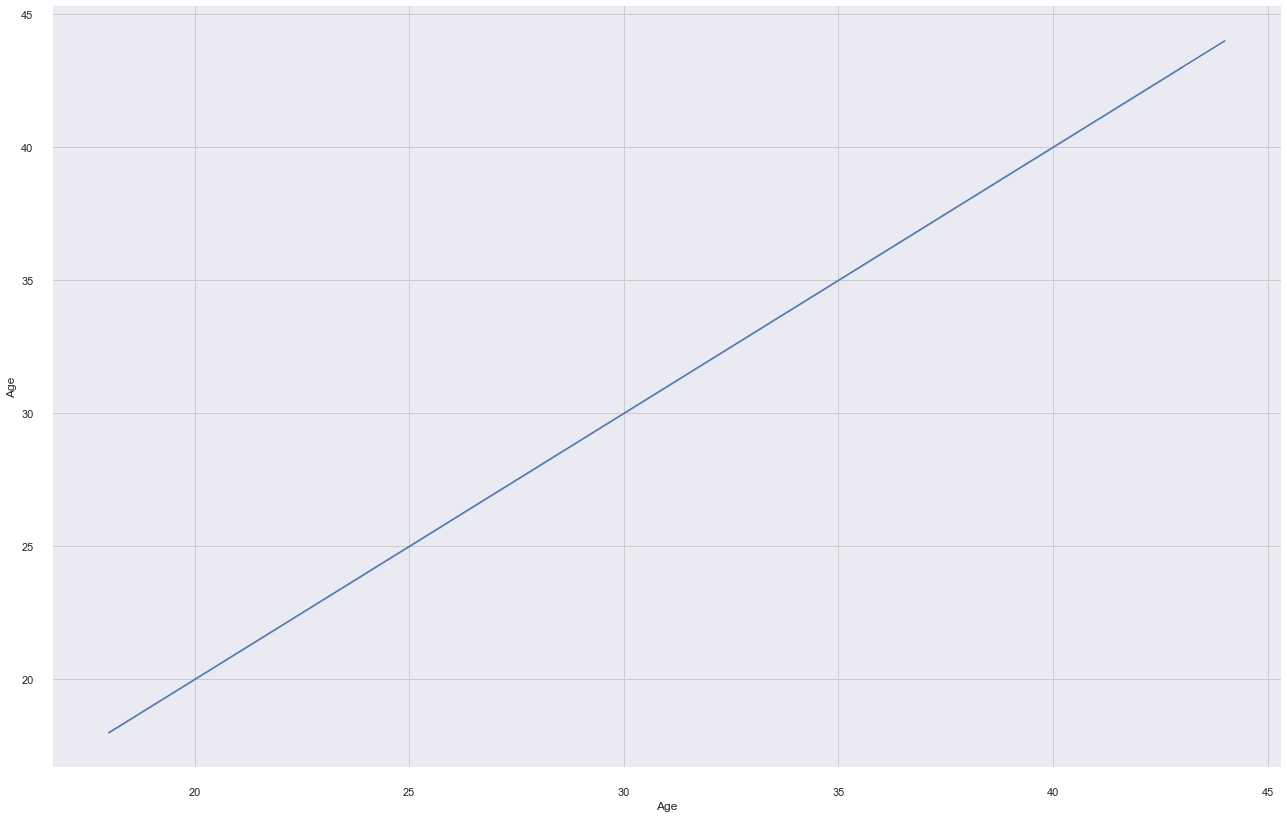

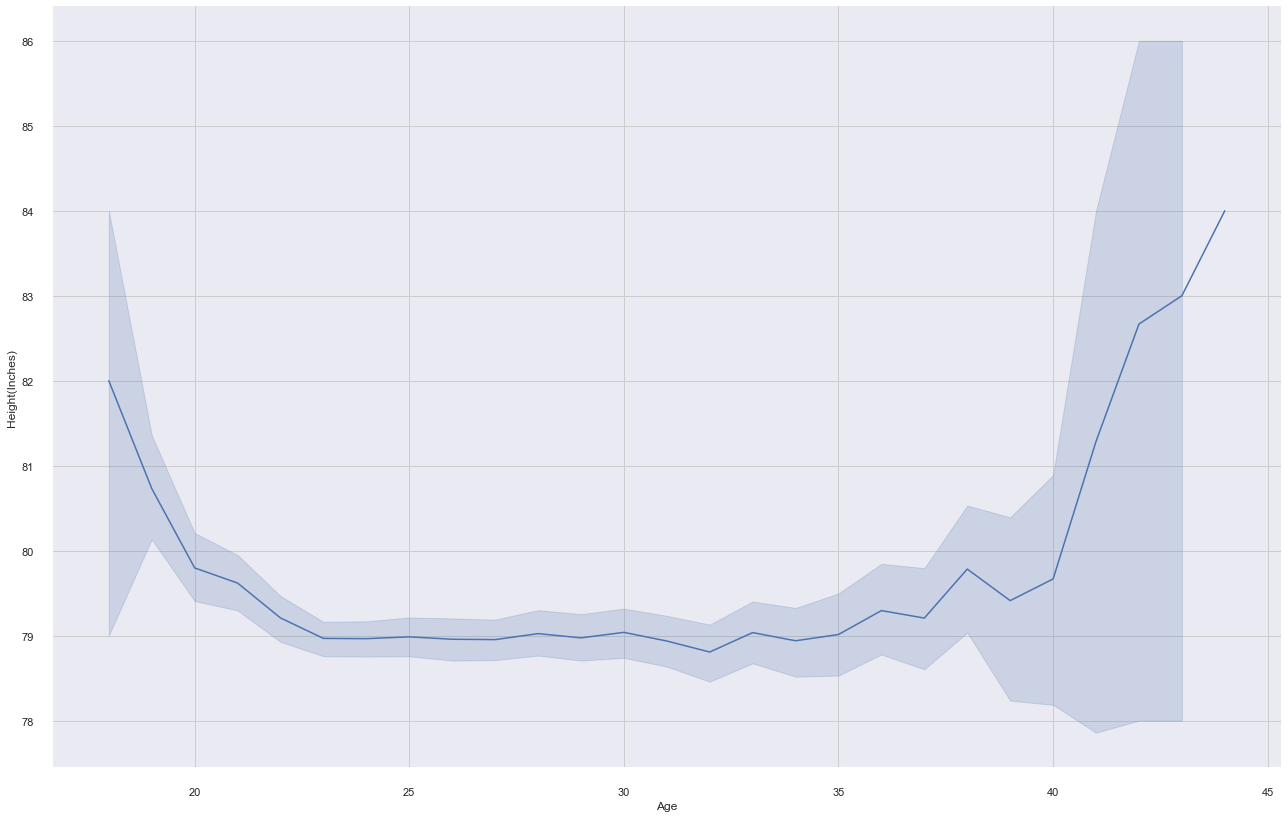

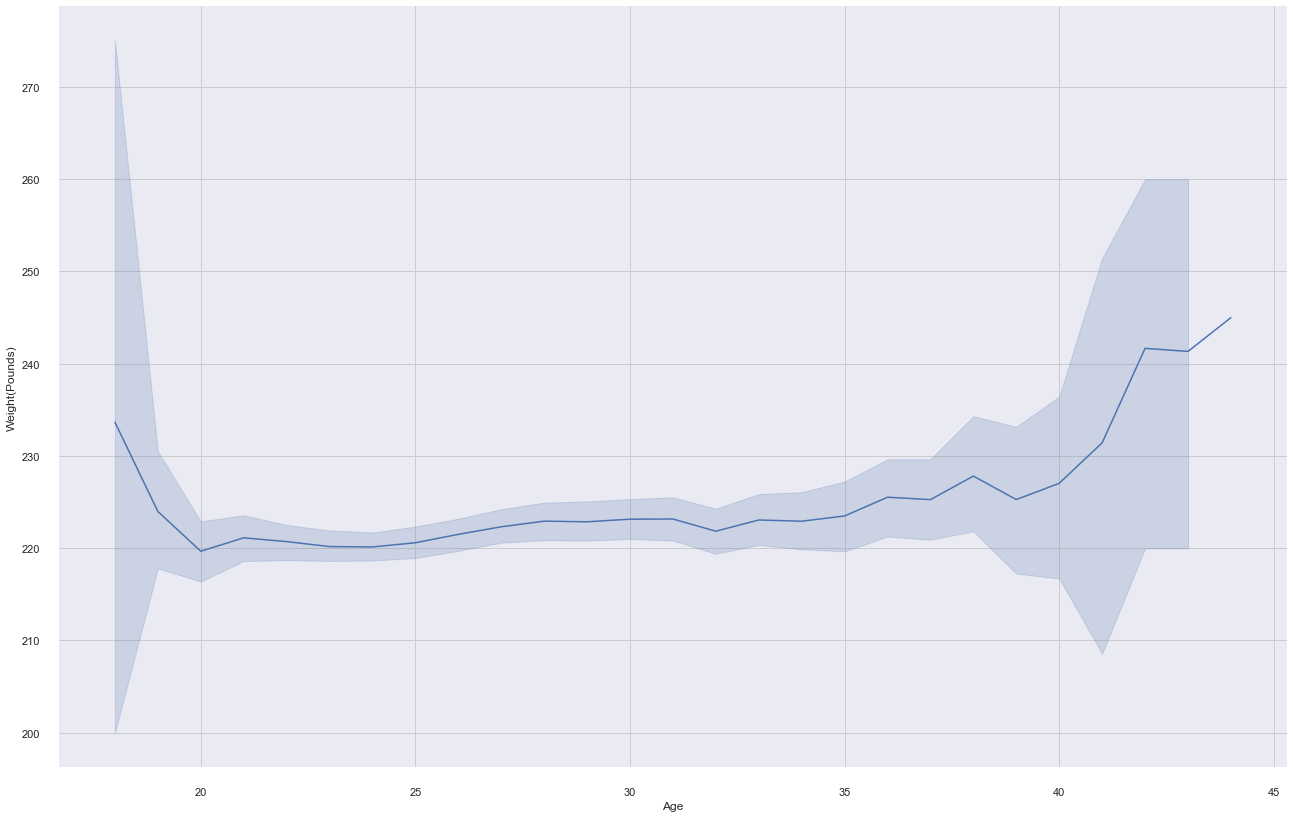

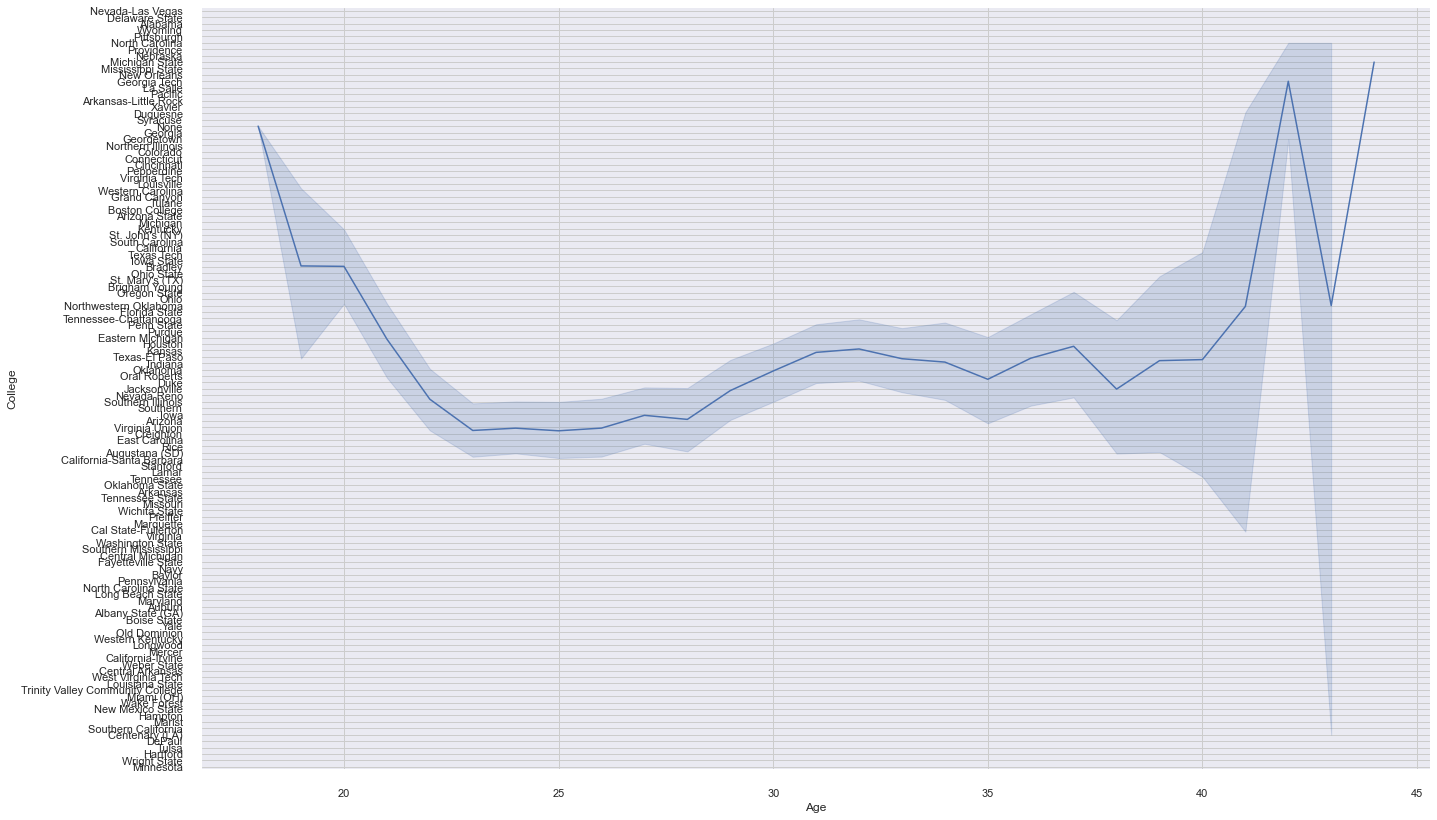

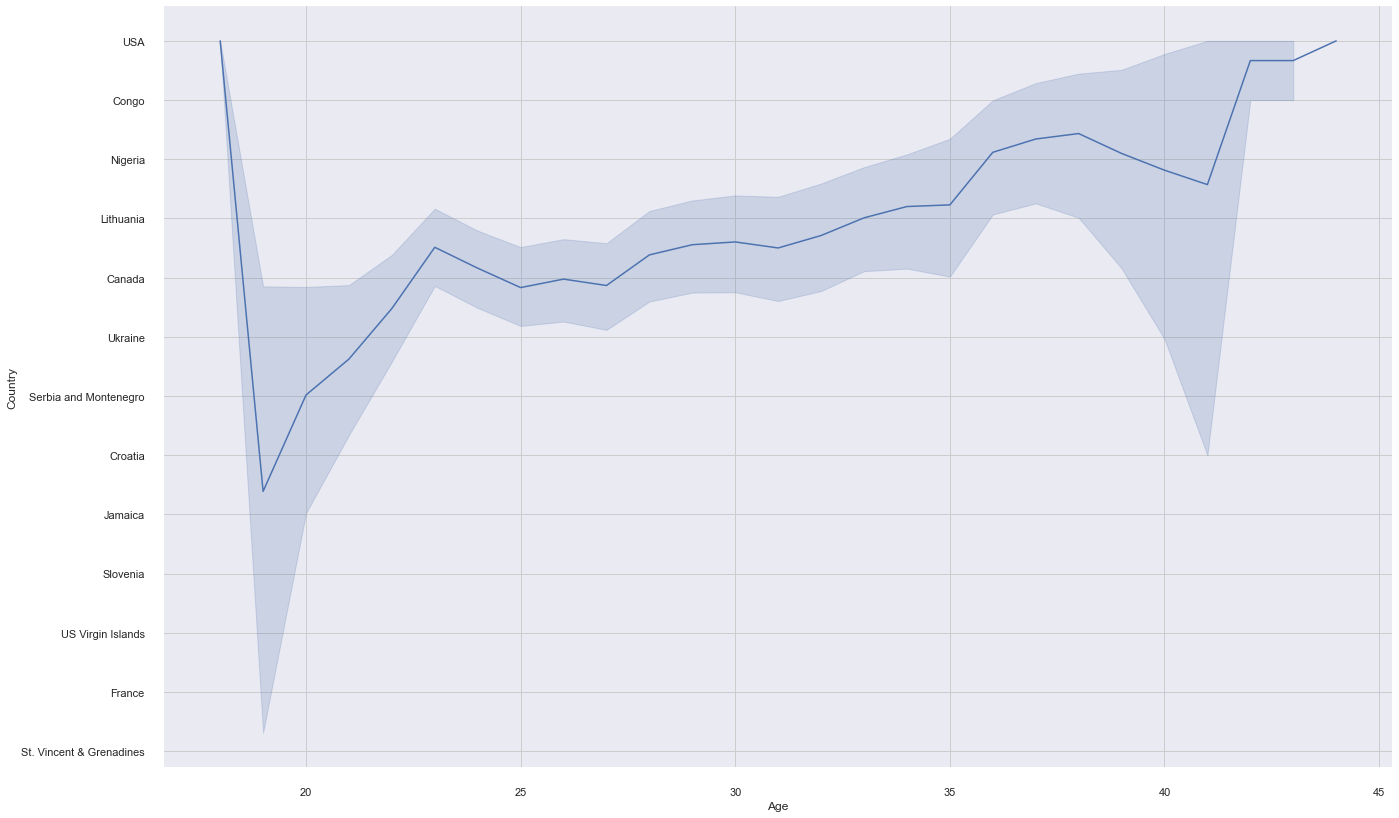

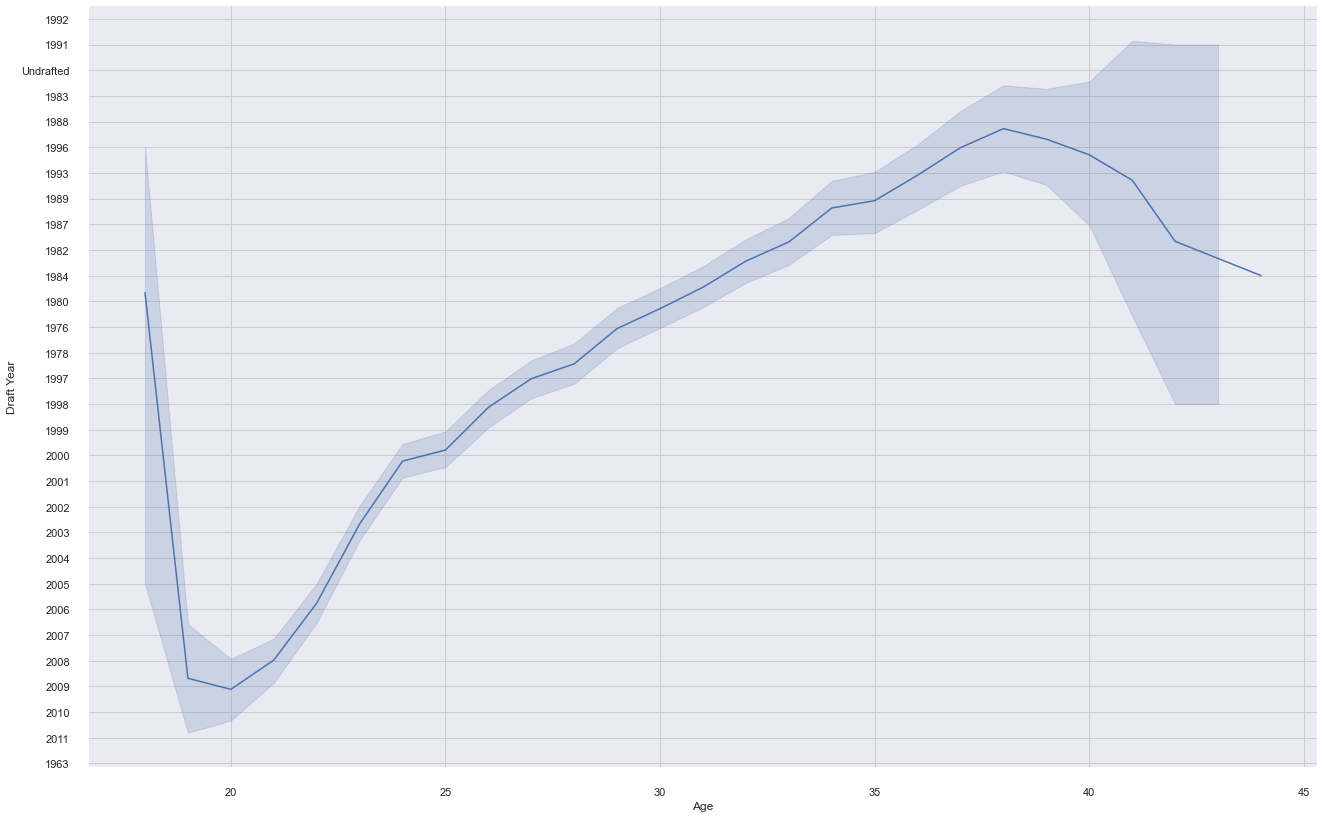

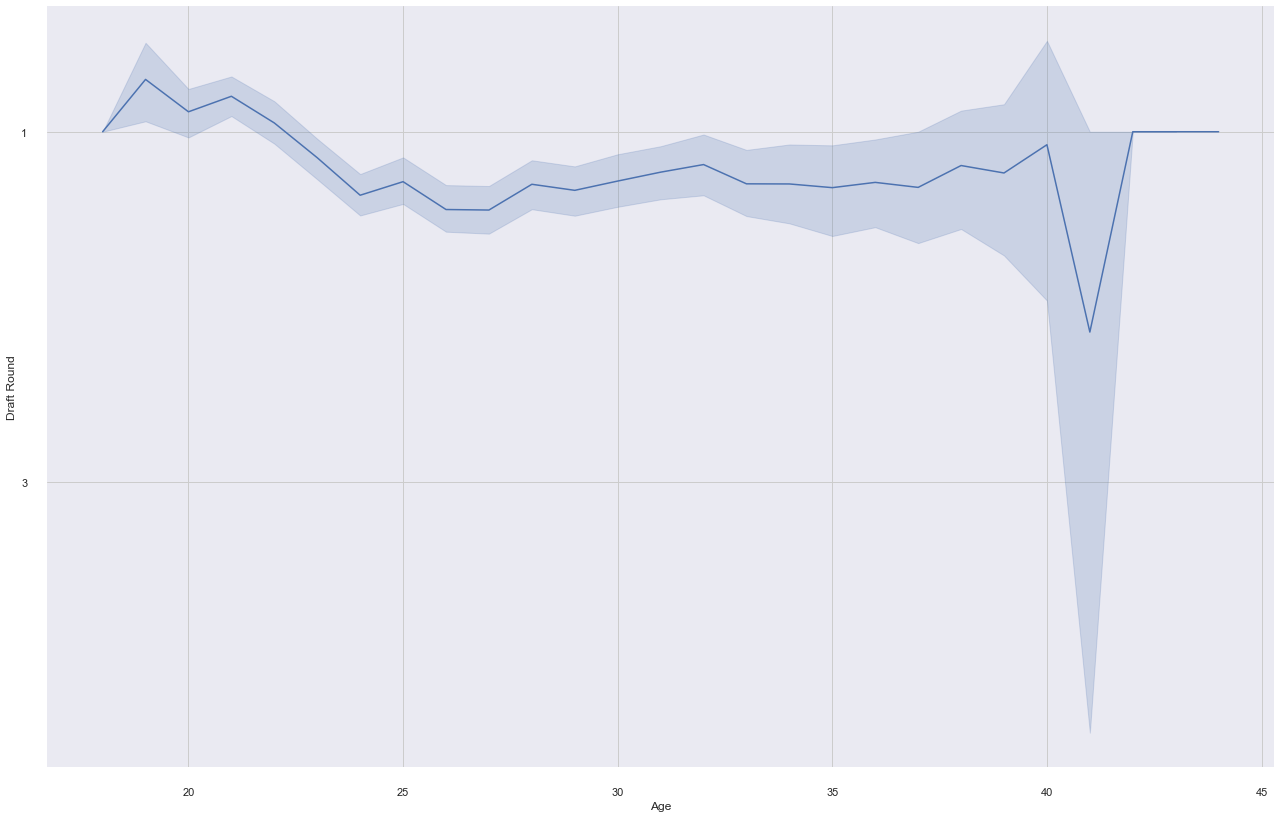

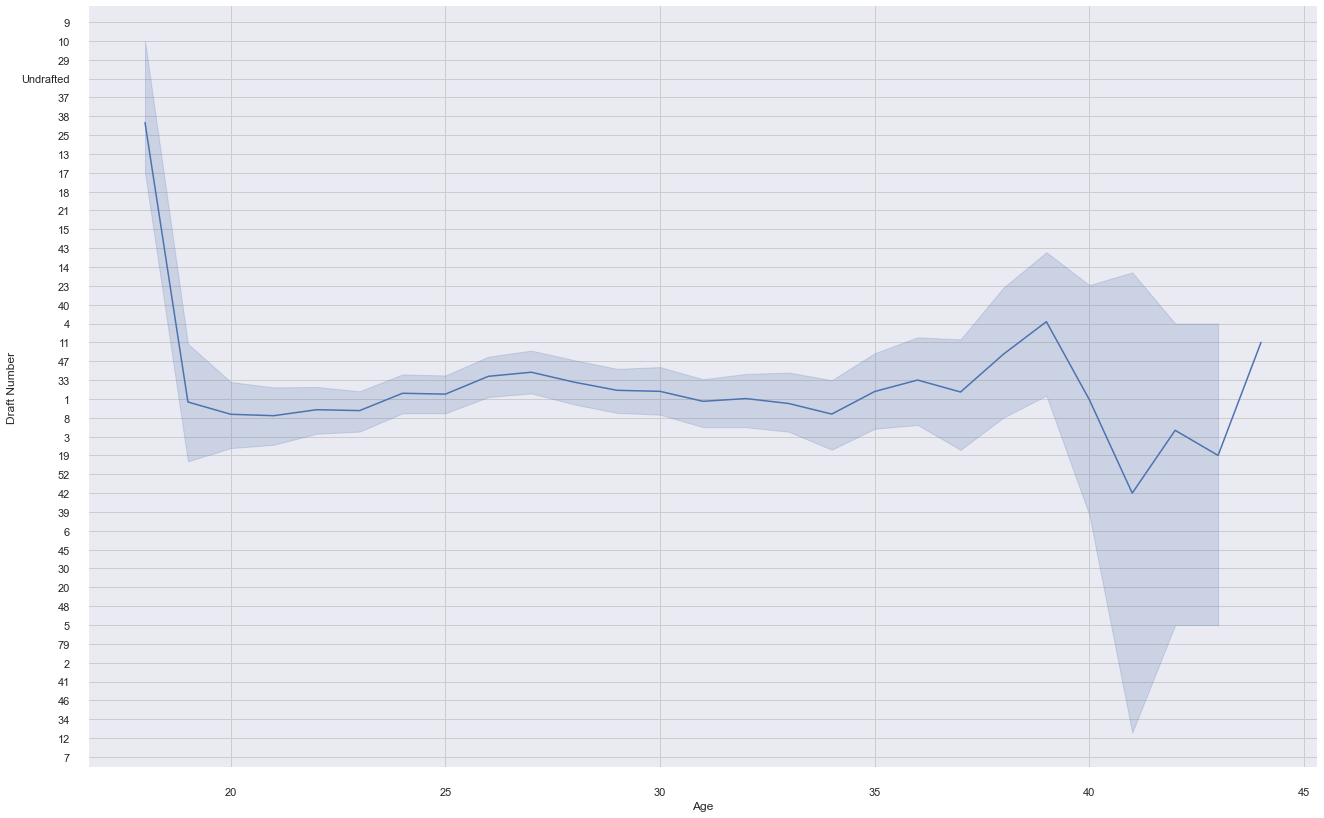

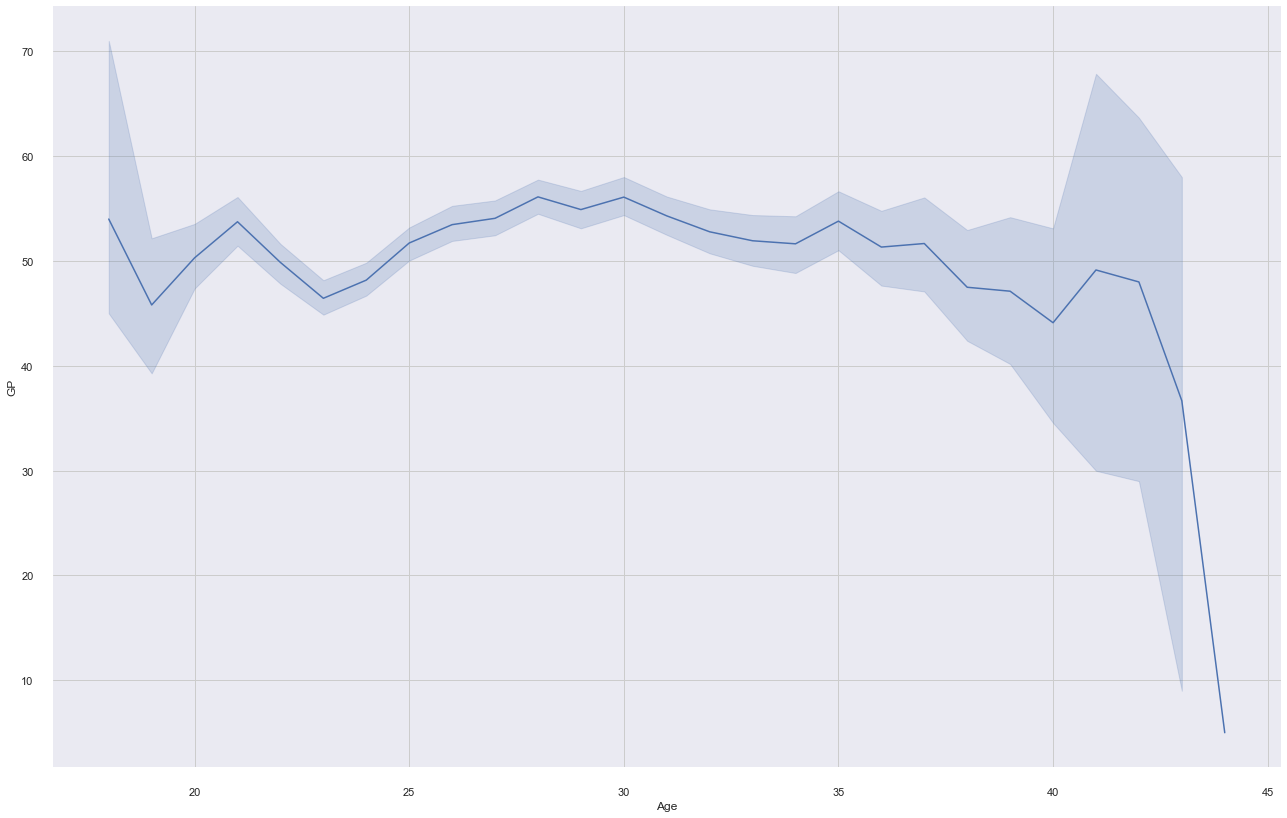

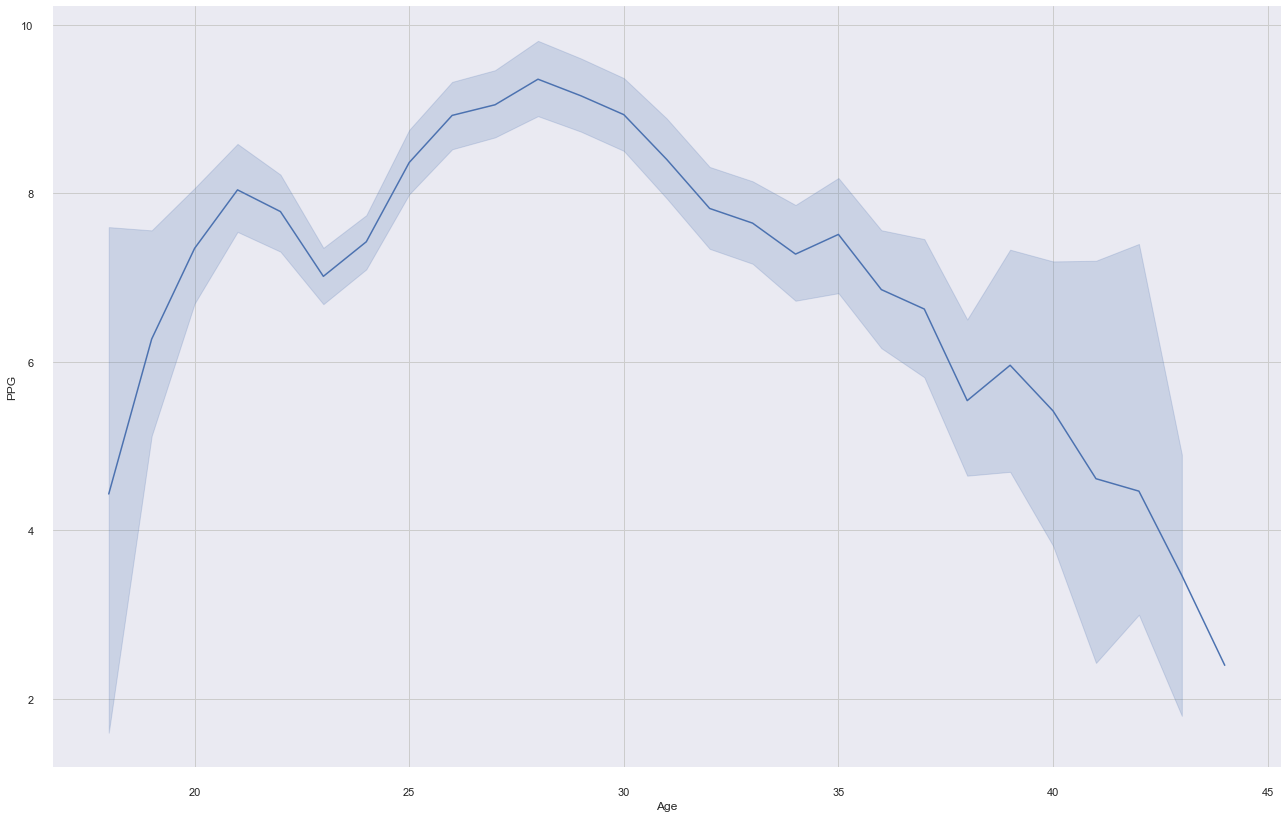

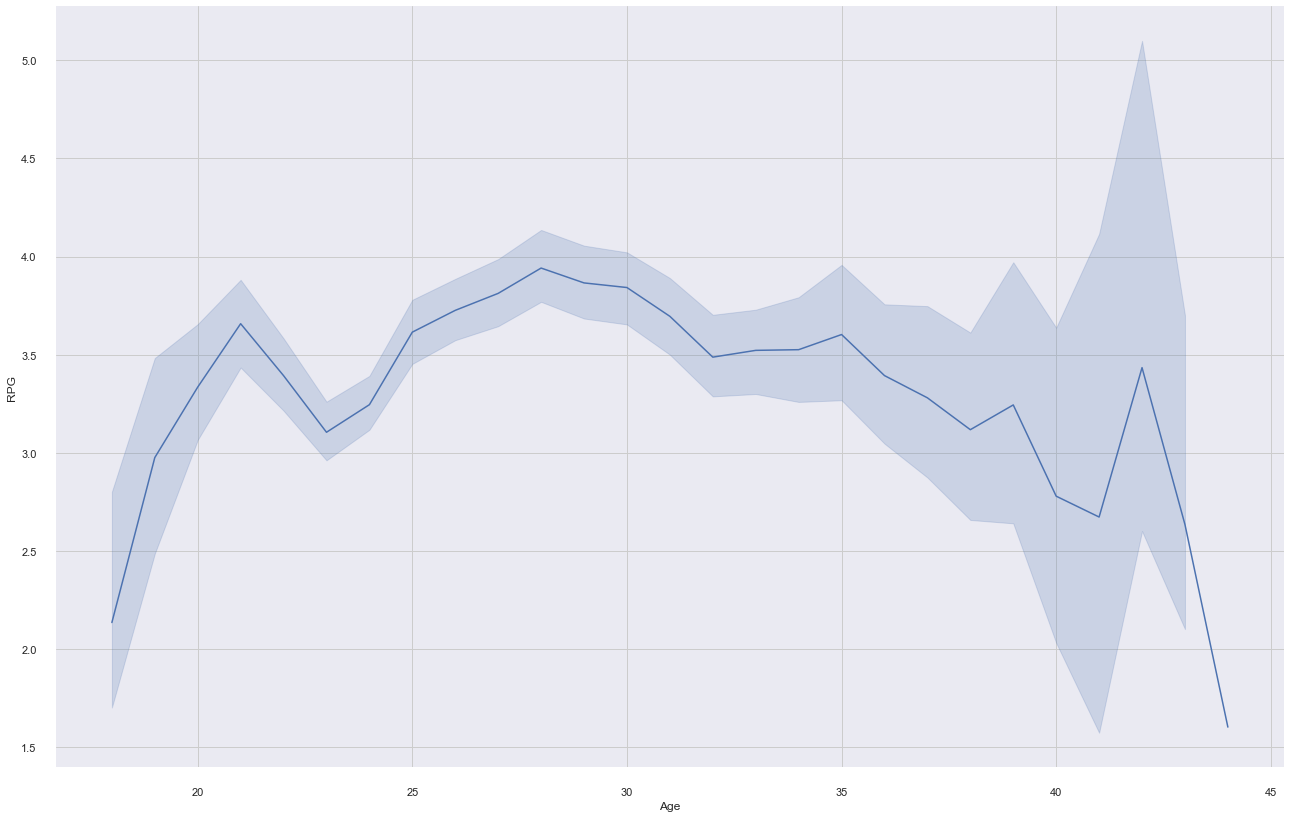

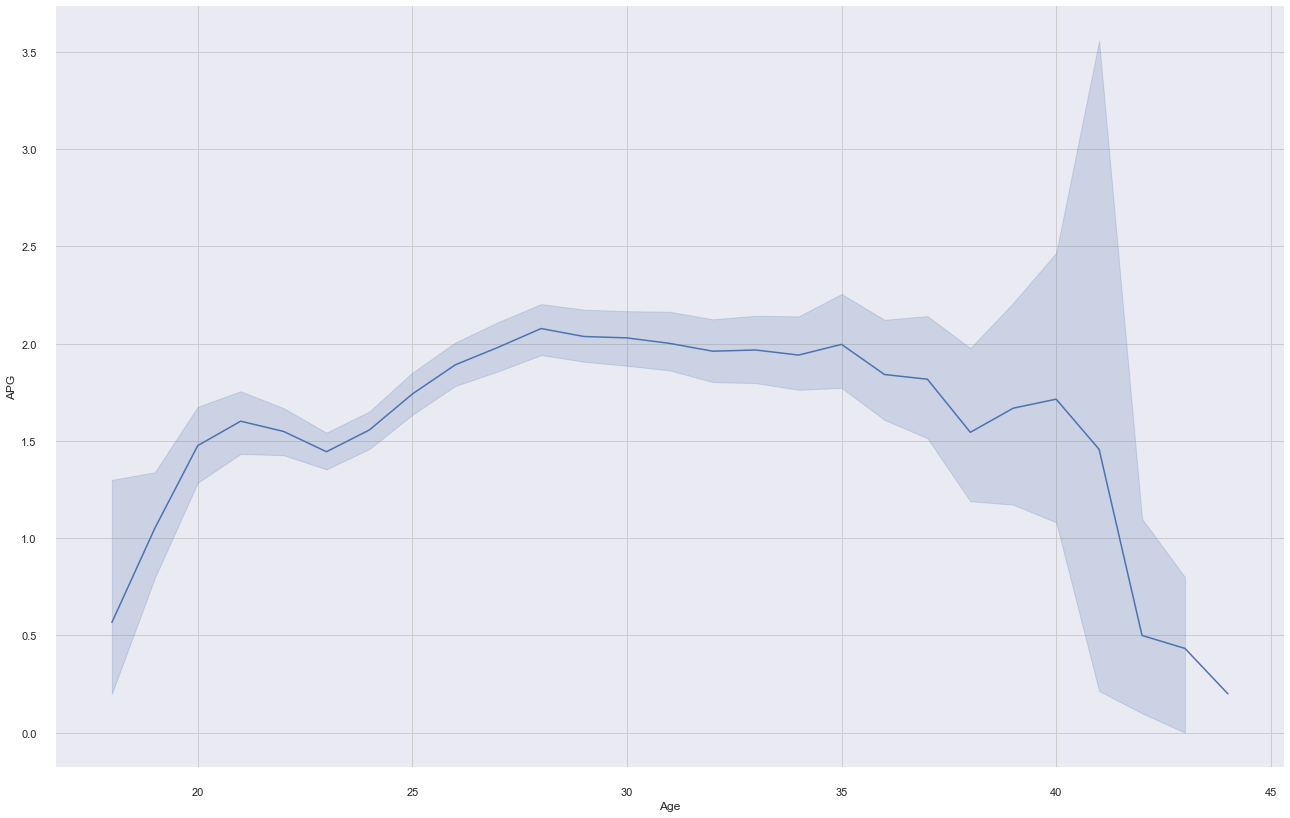

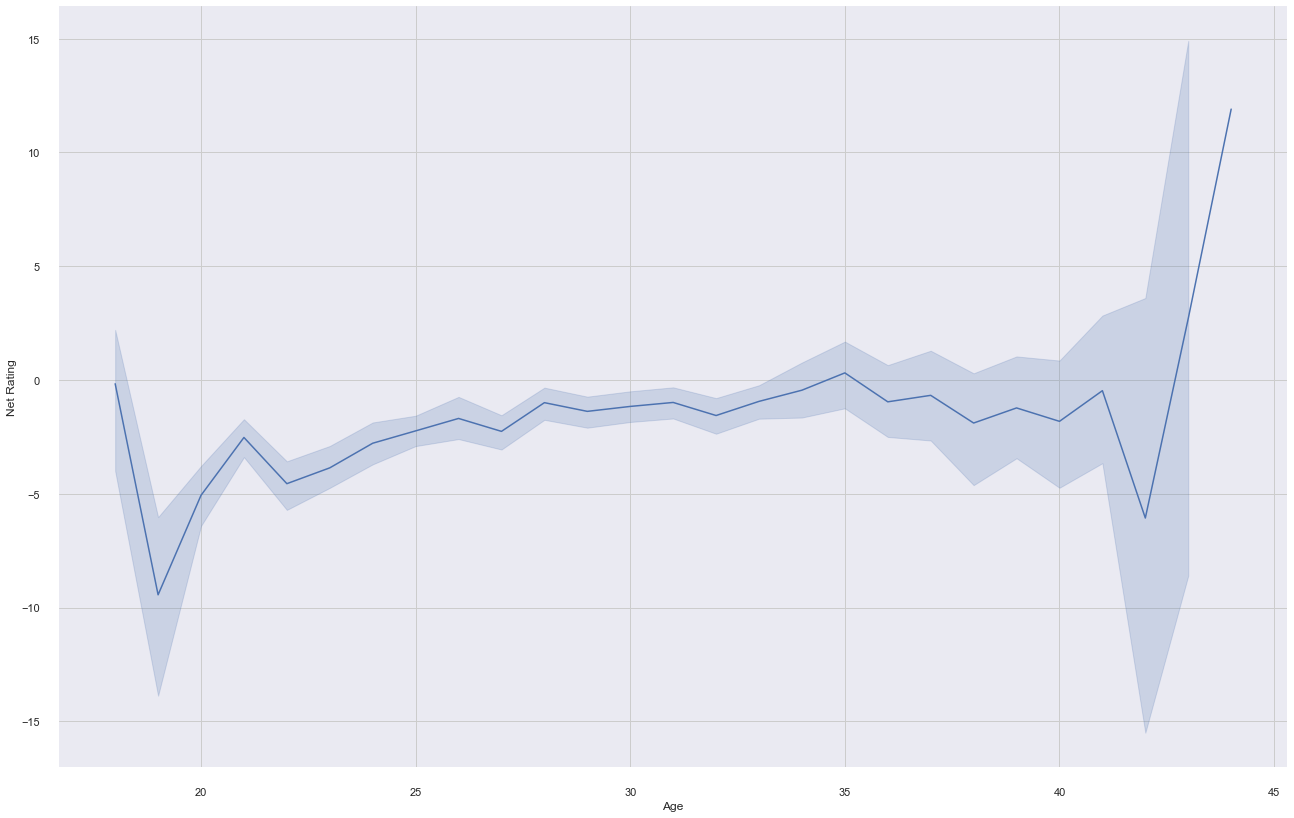

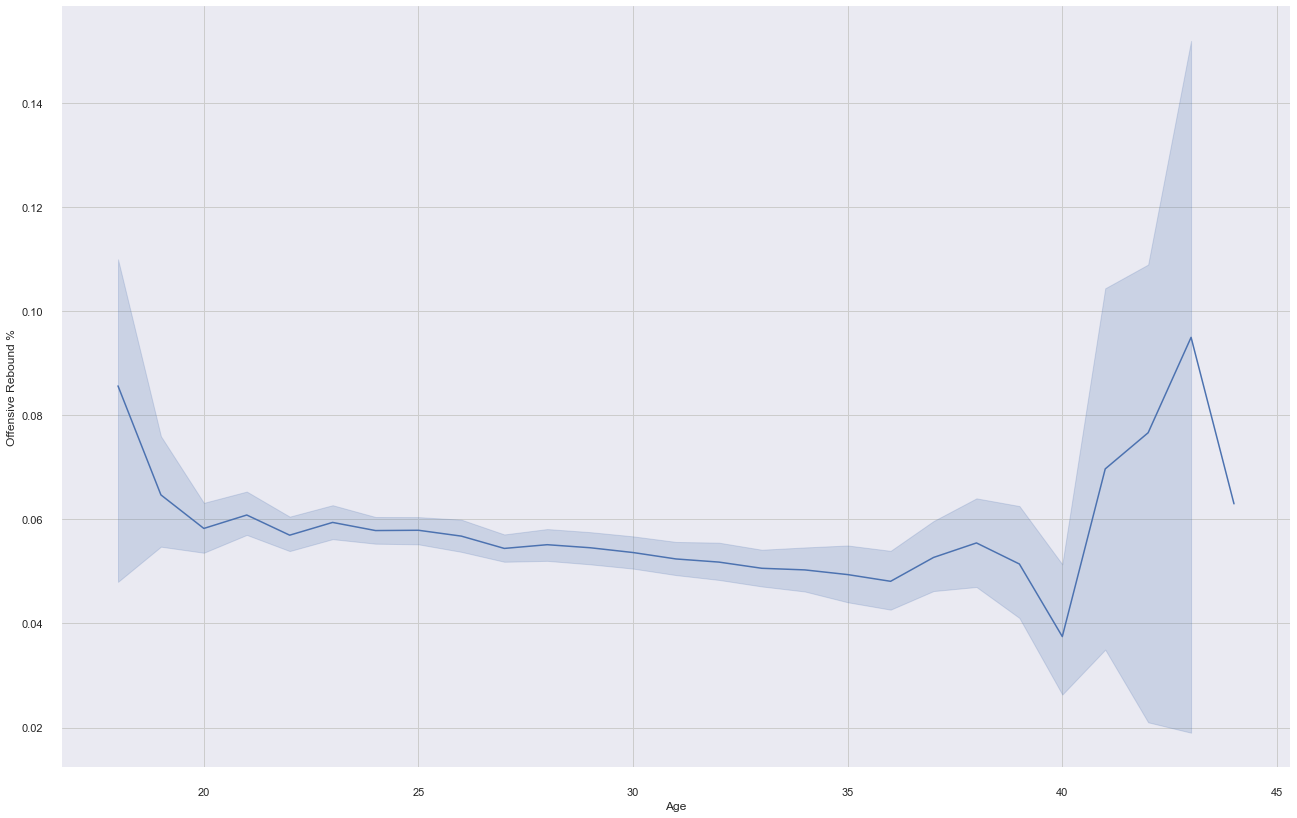

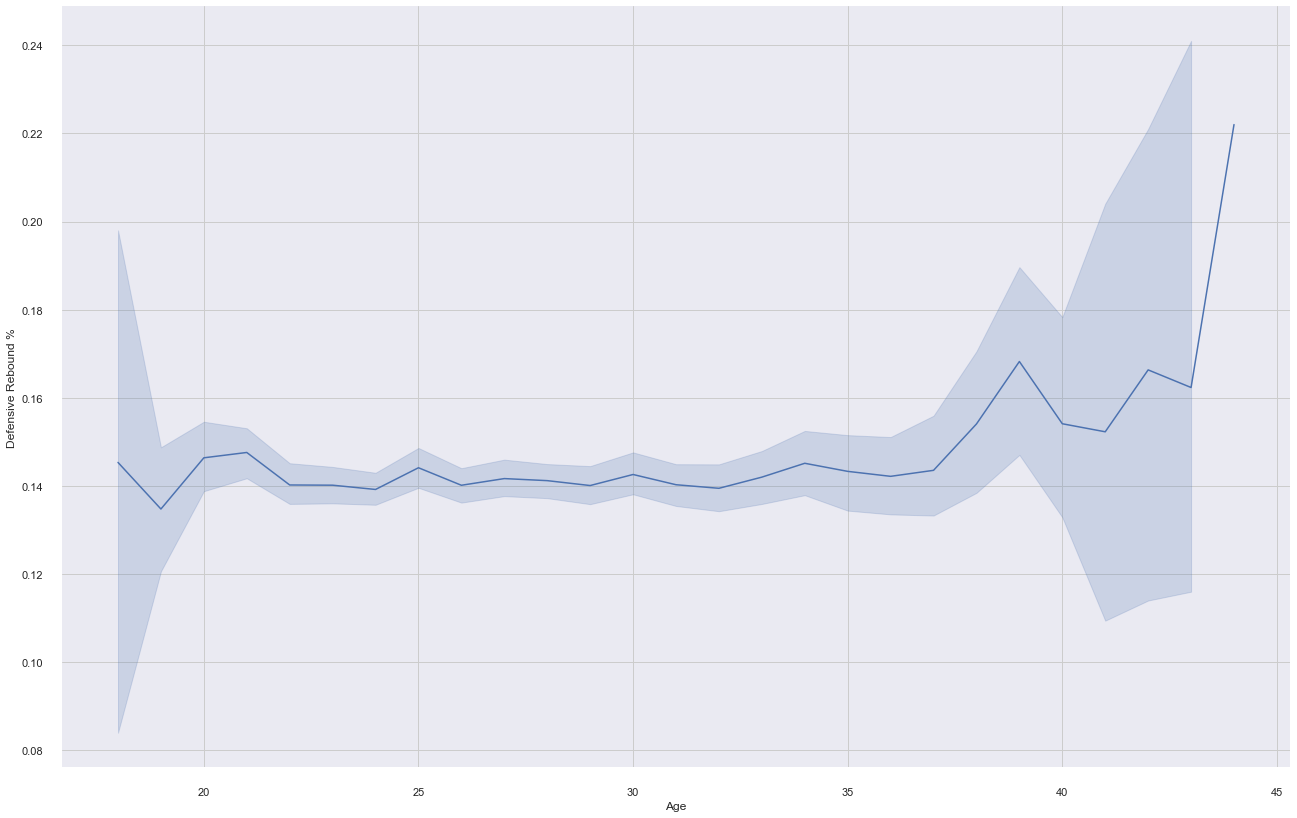

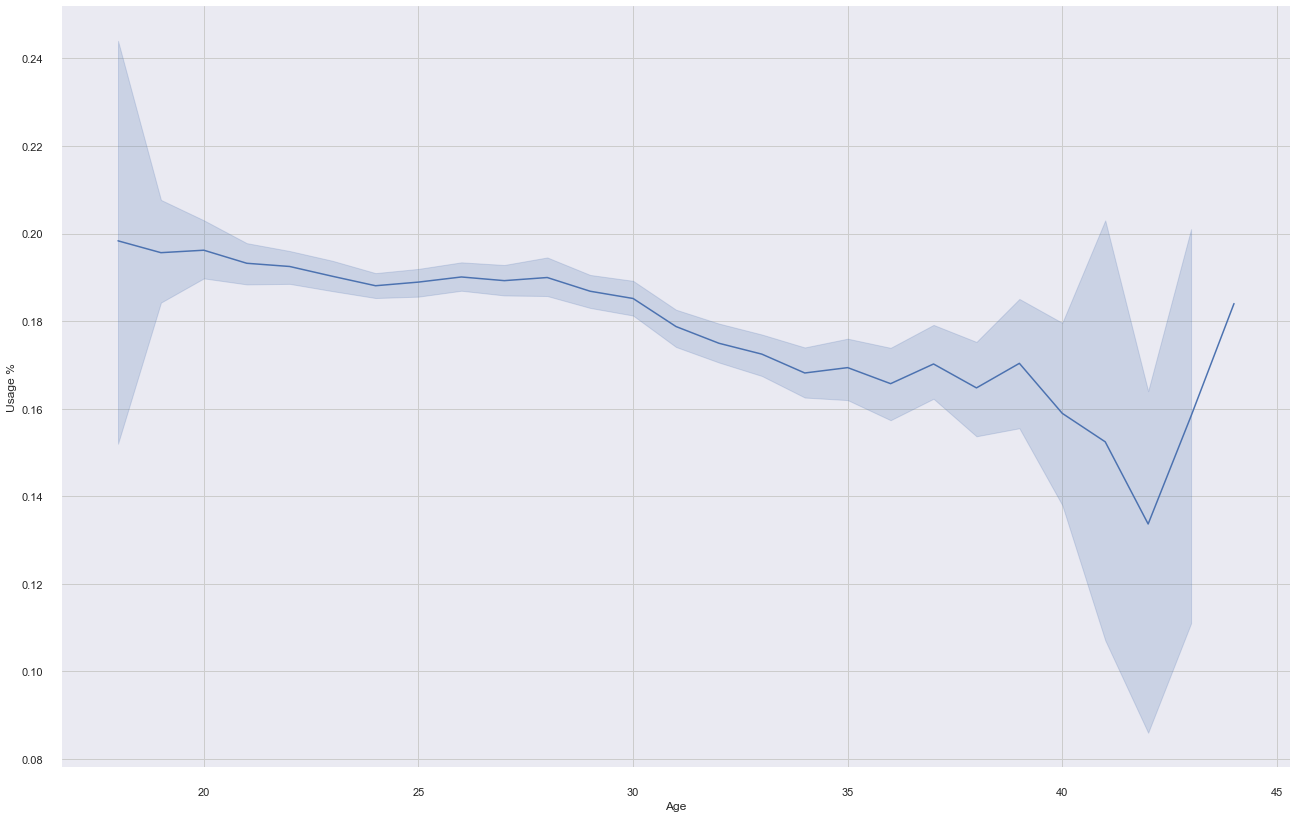

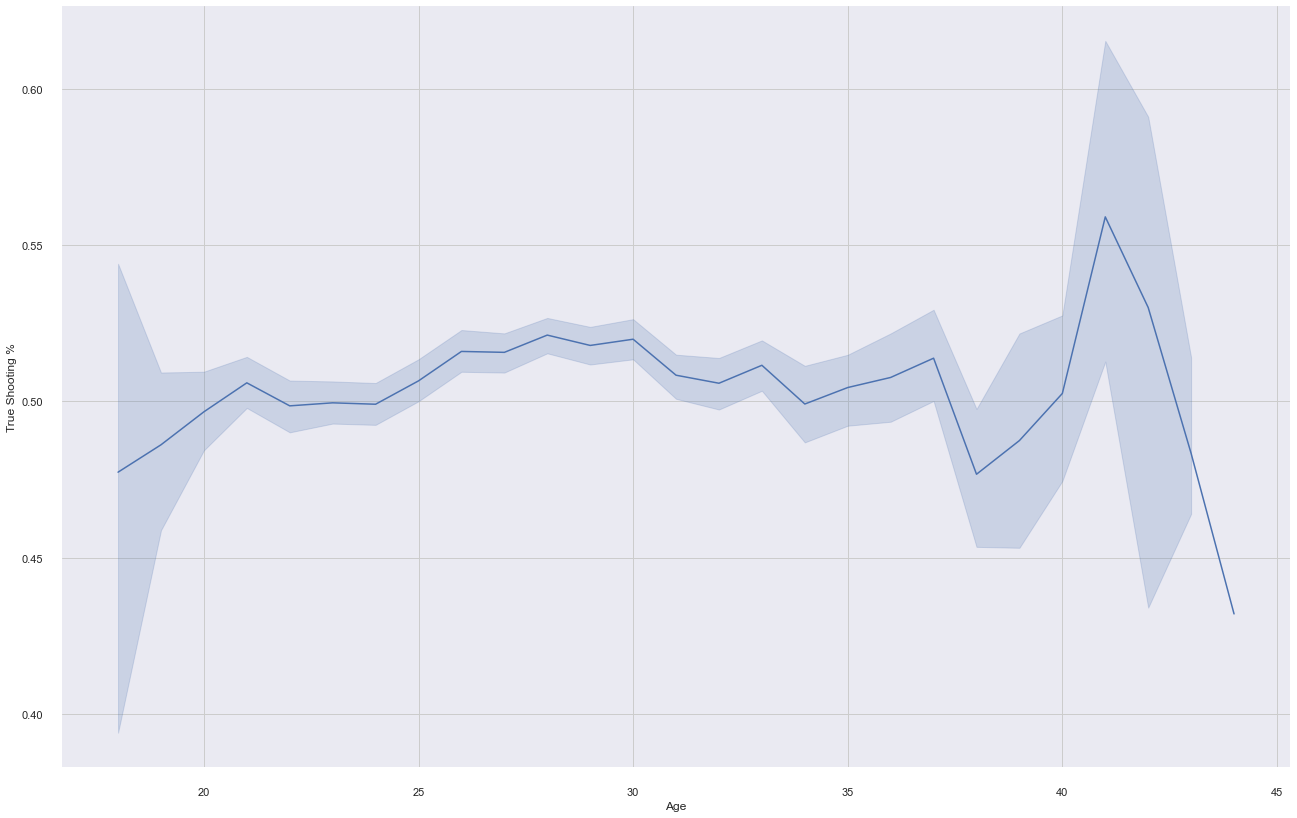

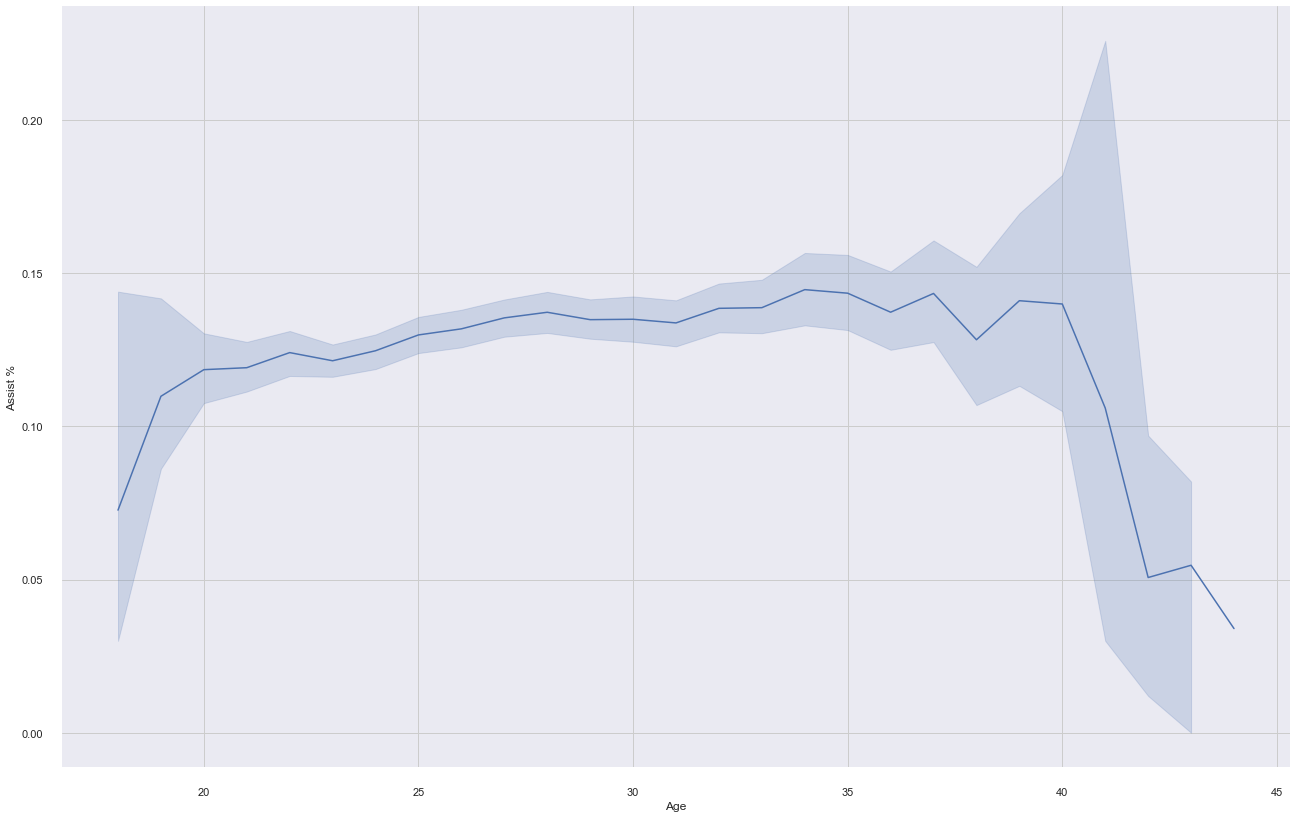

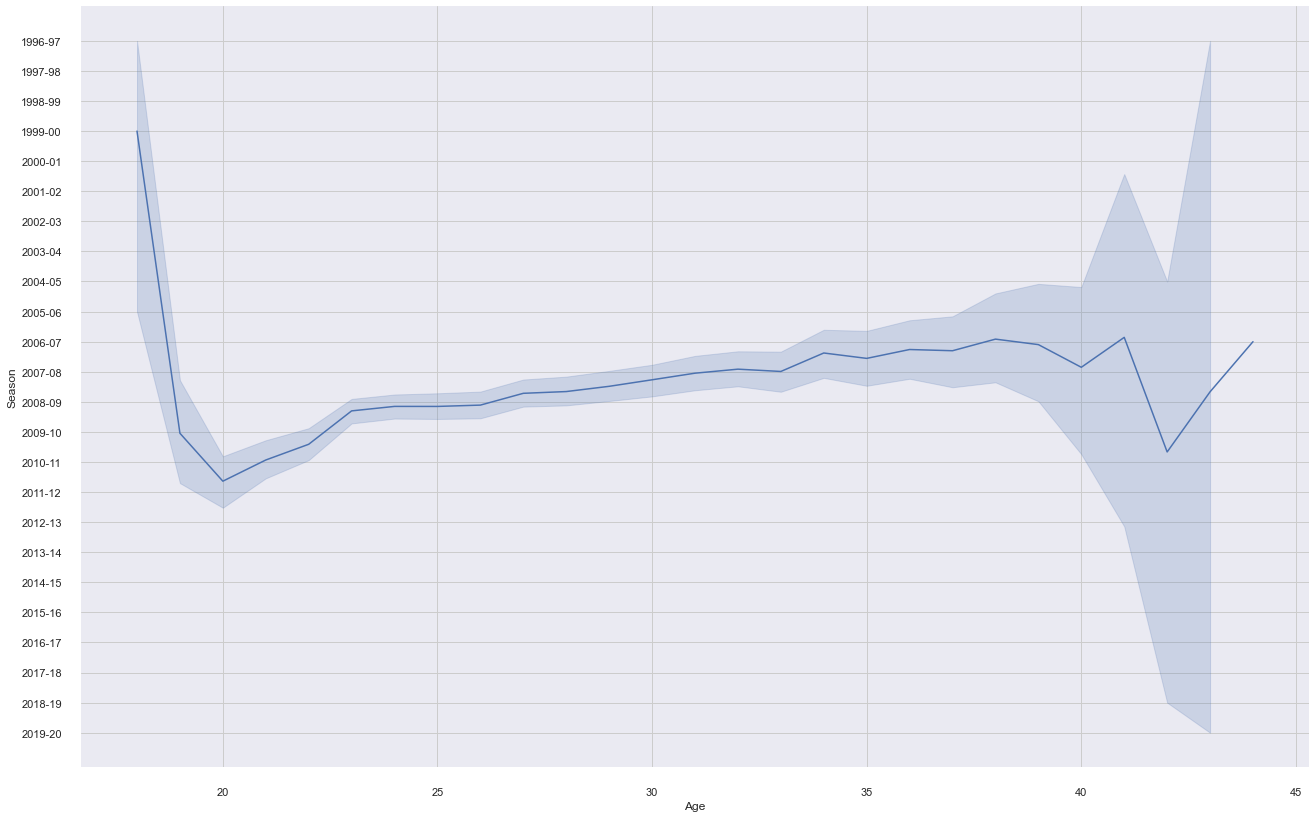

In [15]:
for column in nbaplayers.columns[1:]:
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style='ticks')
    sns.lineplot(x='Age', y=column, data=nbaplayers)
    sns.despine(offset=10, trim=True)
    fig.set_size_inches(22,14)

In [16]:
#It is important to note that are non-numeric and static data values that are not relevent for analysis in the dataset
#When looking at age compared to other variables, it responds strong to PPG, Usage%, as well as Offensive Rebound %
#In a player's late 30s and early 40s all of the values tend to plummet
#I am interested in net rating as it is a common statistic used to measure players

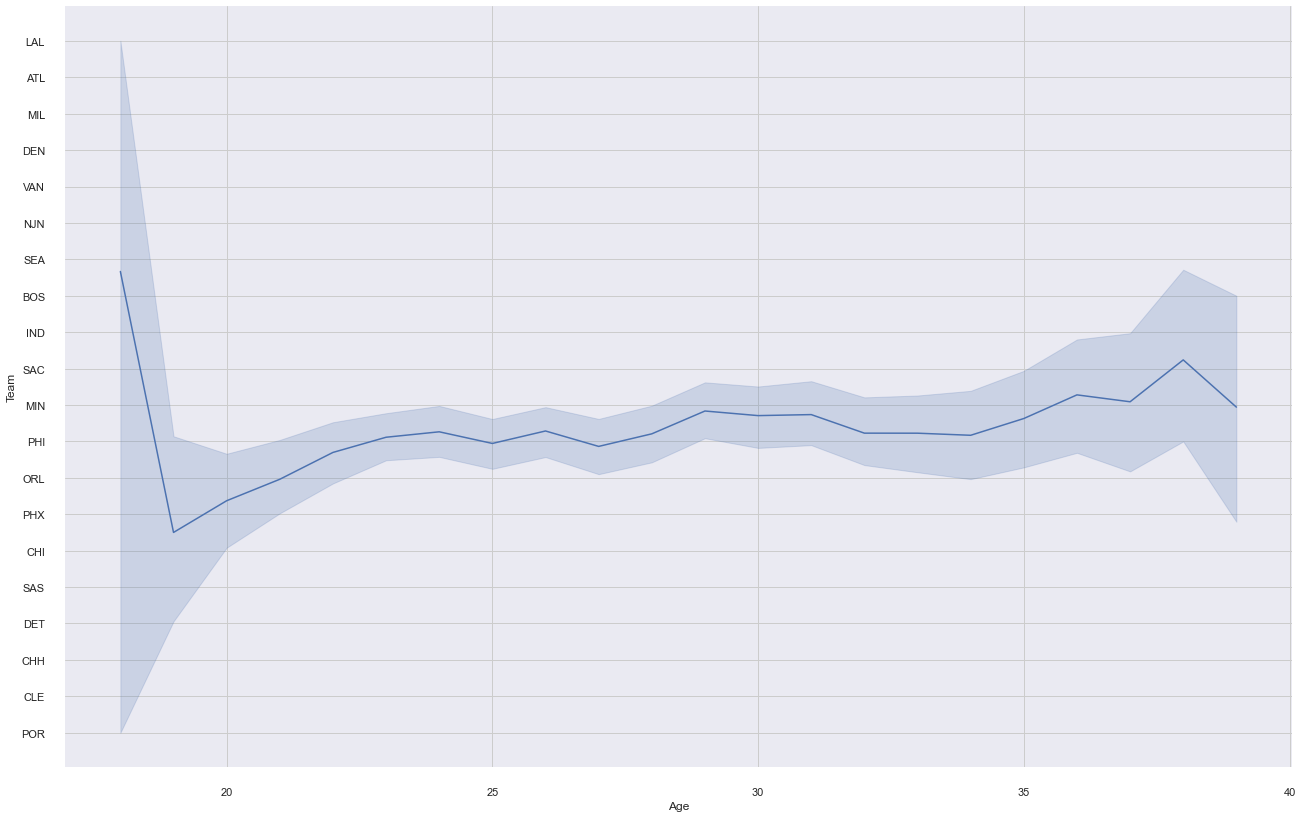

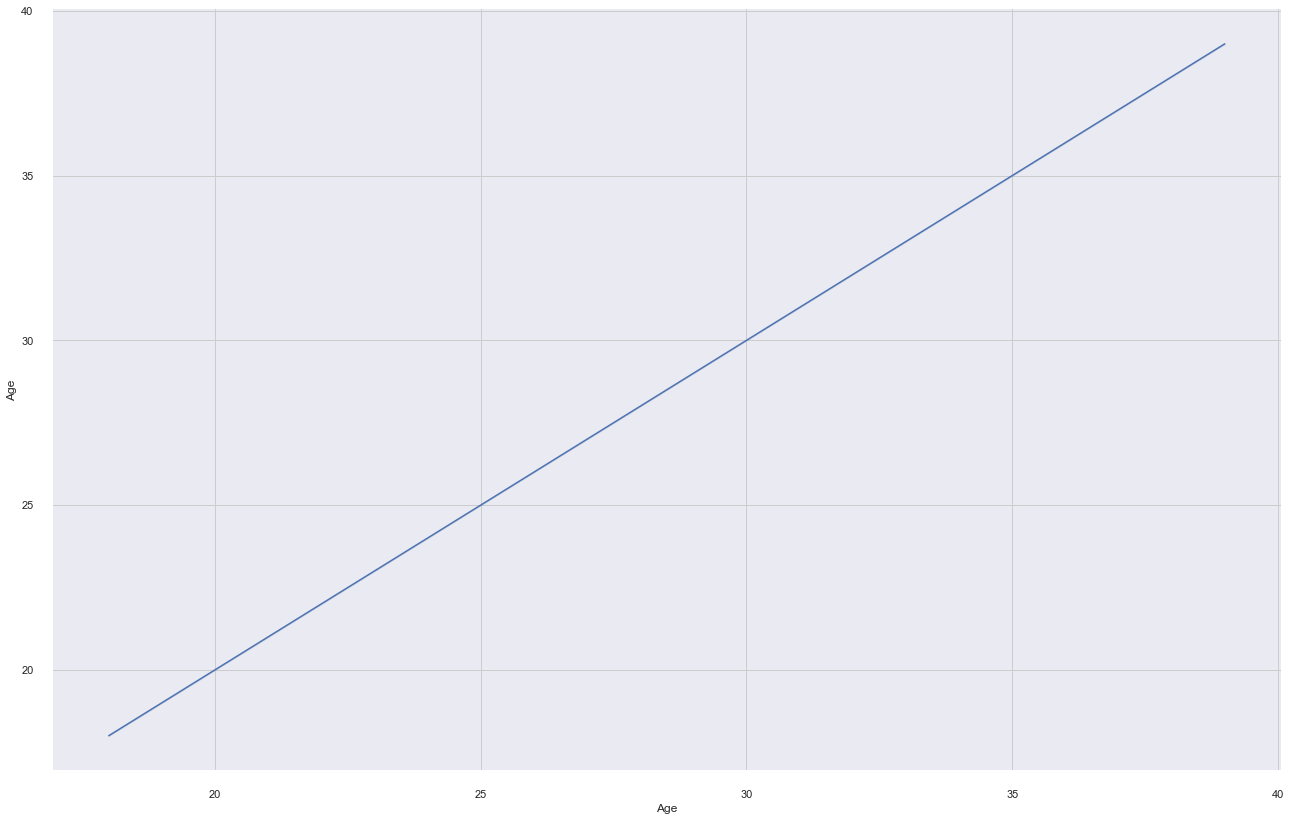

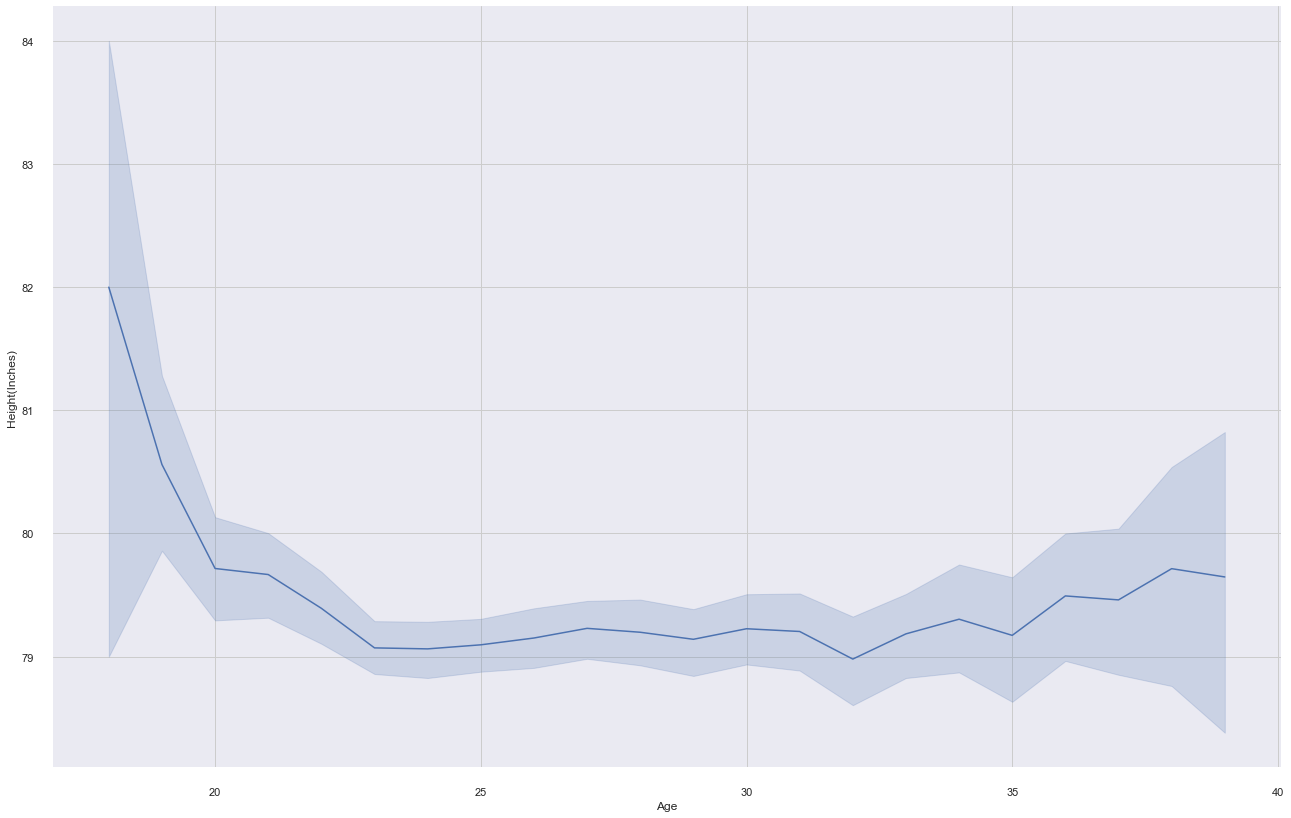

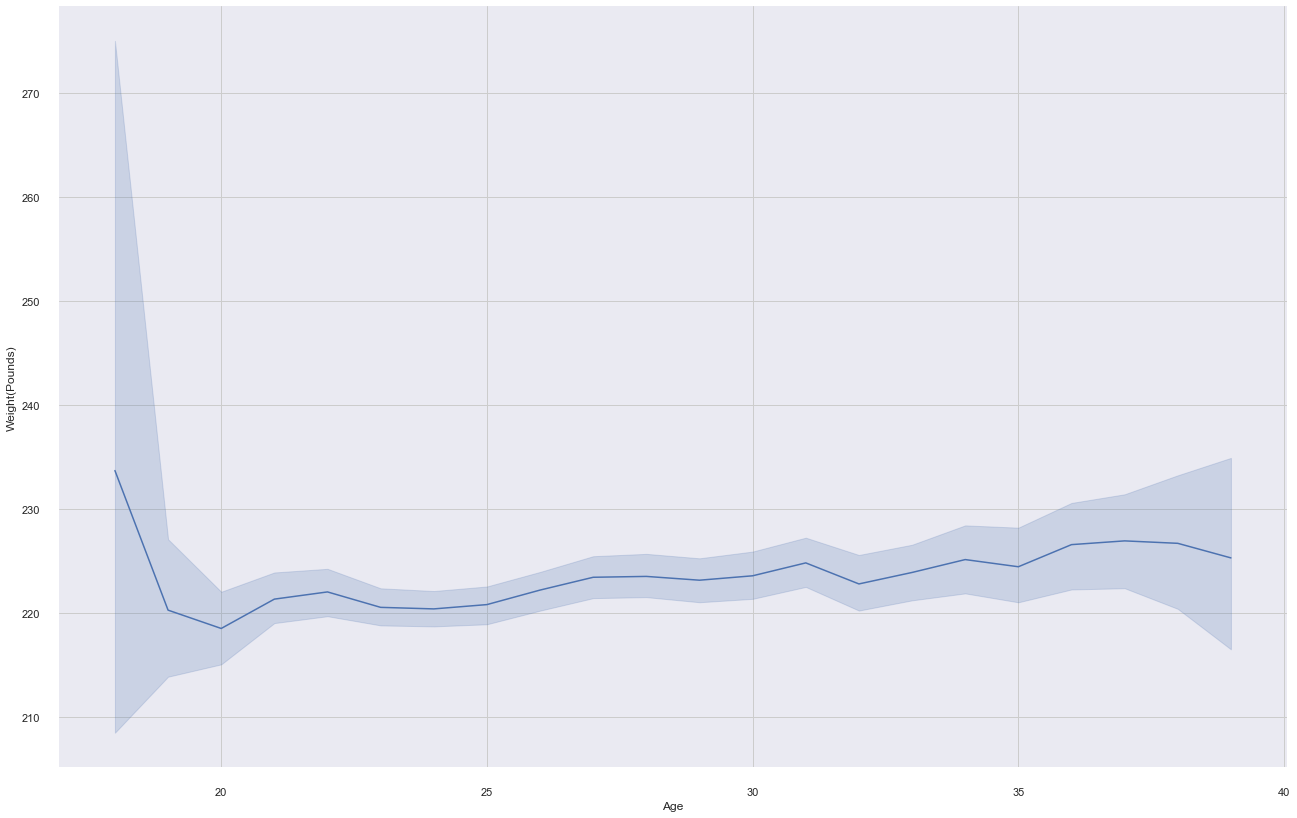

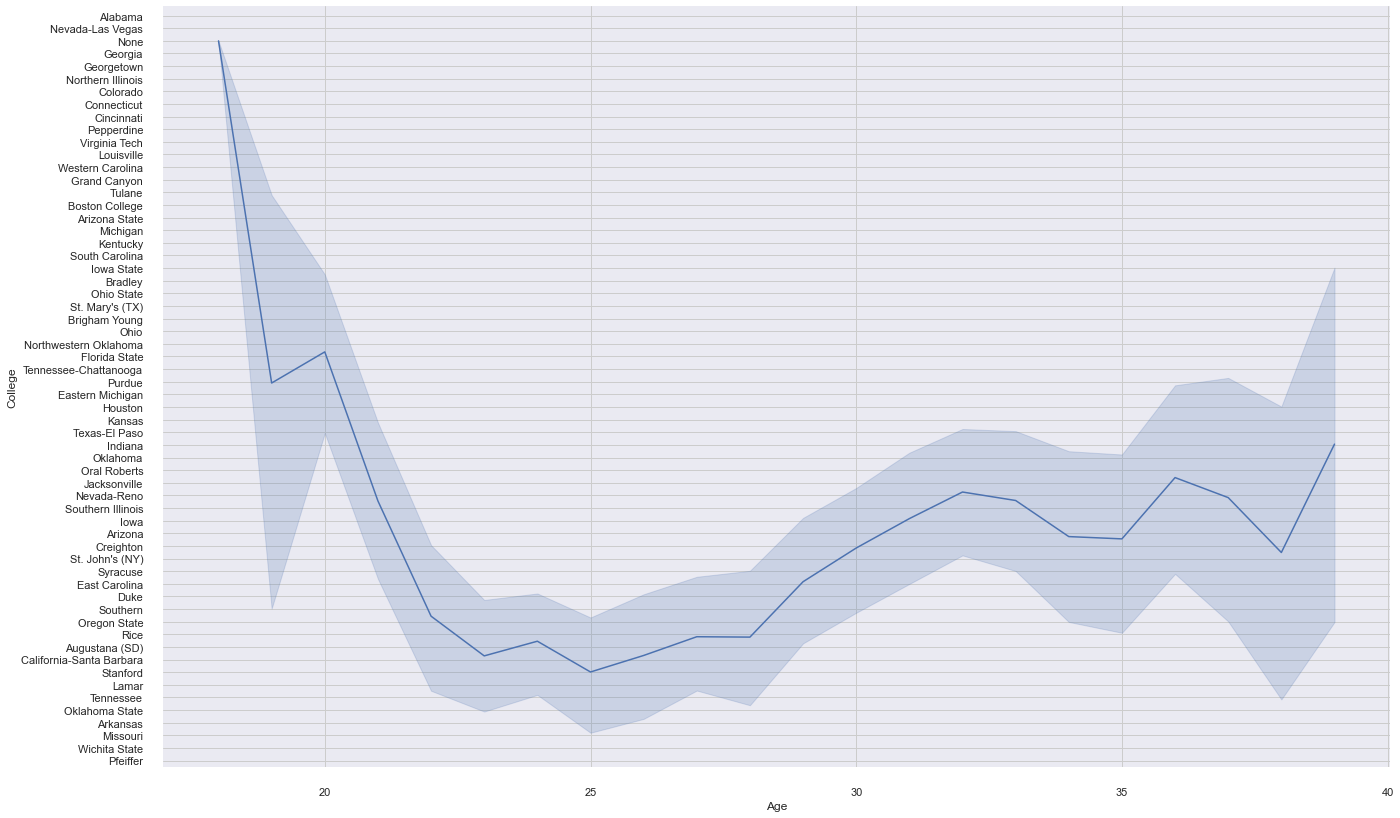

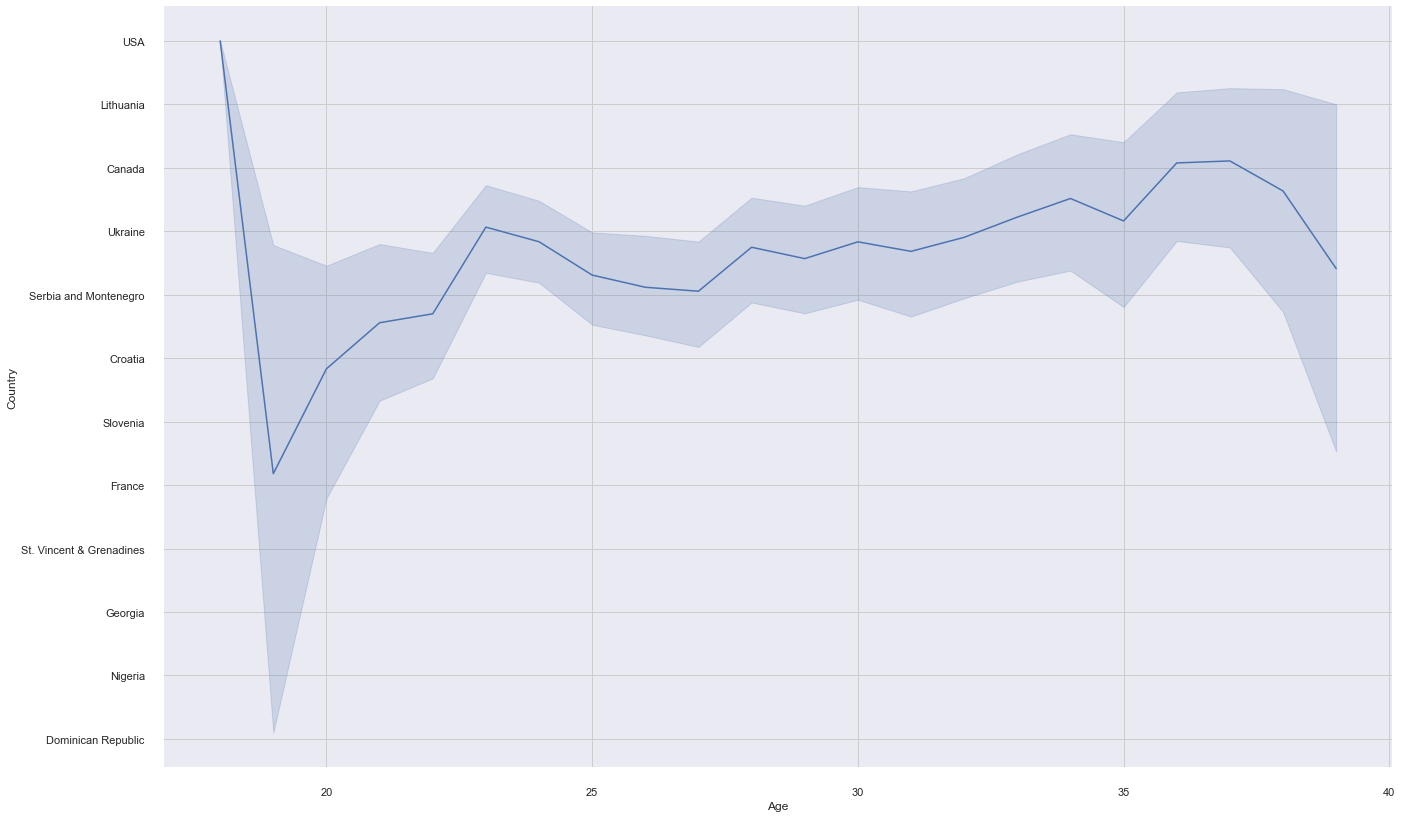

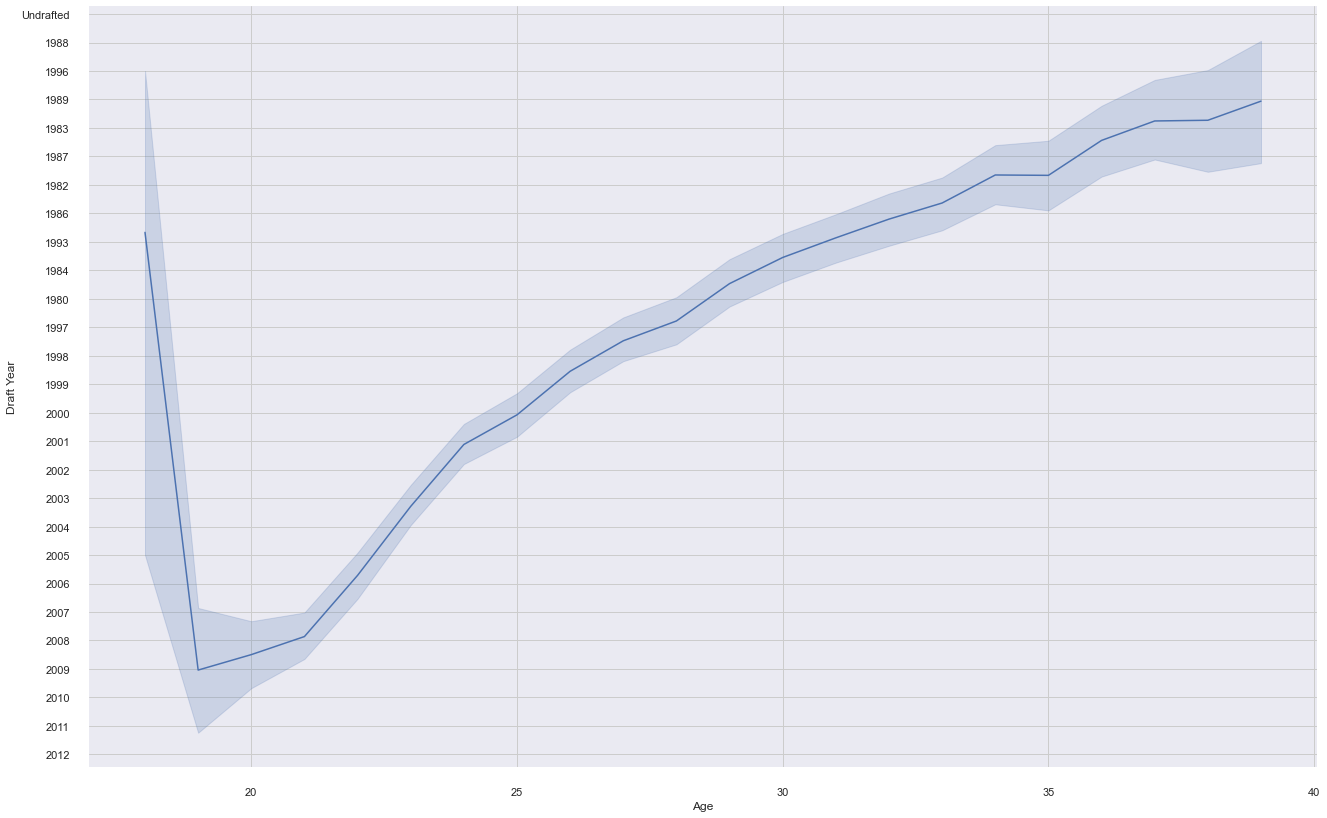

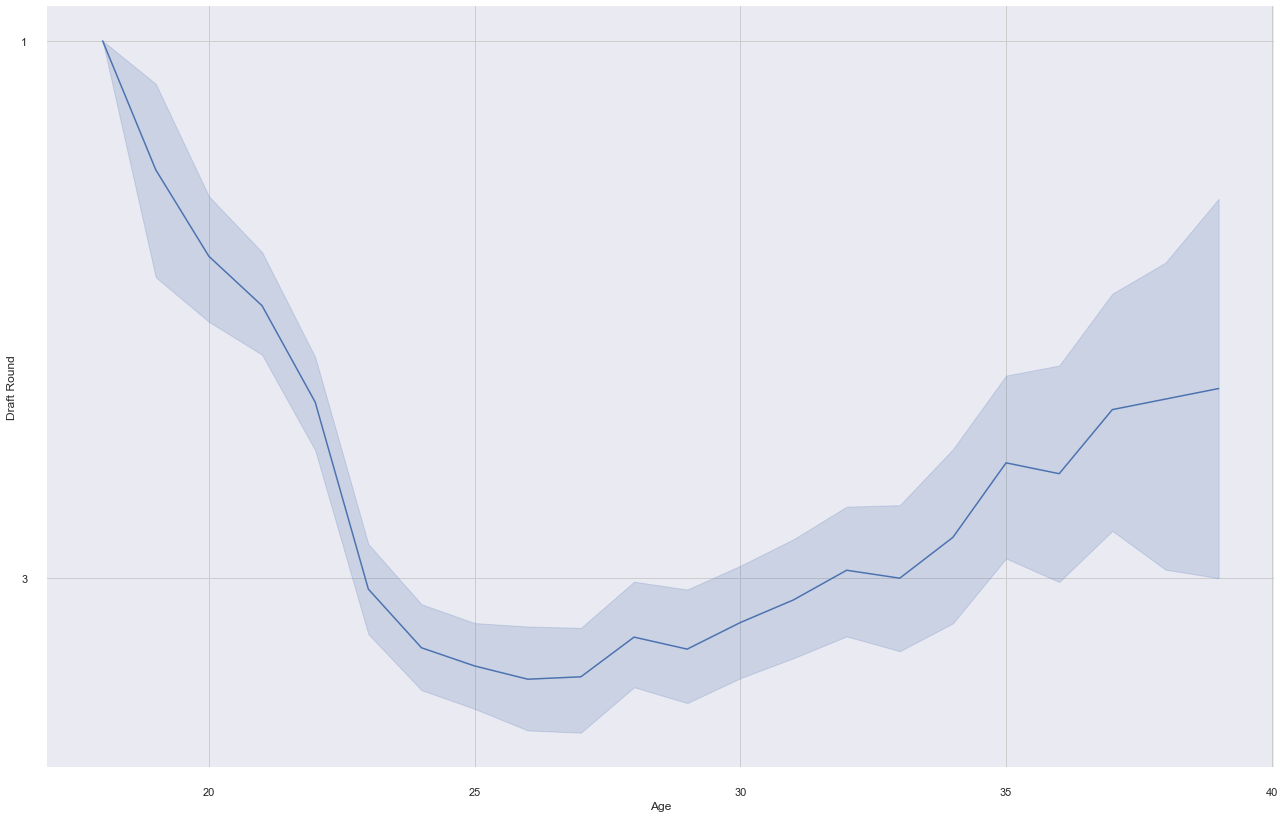

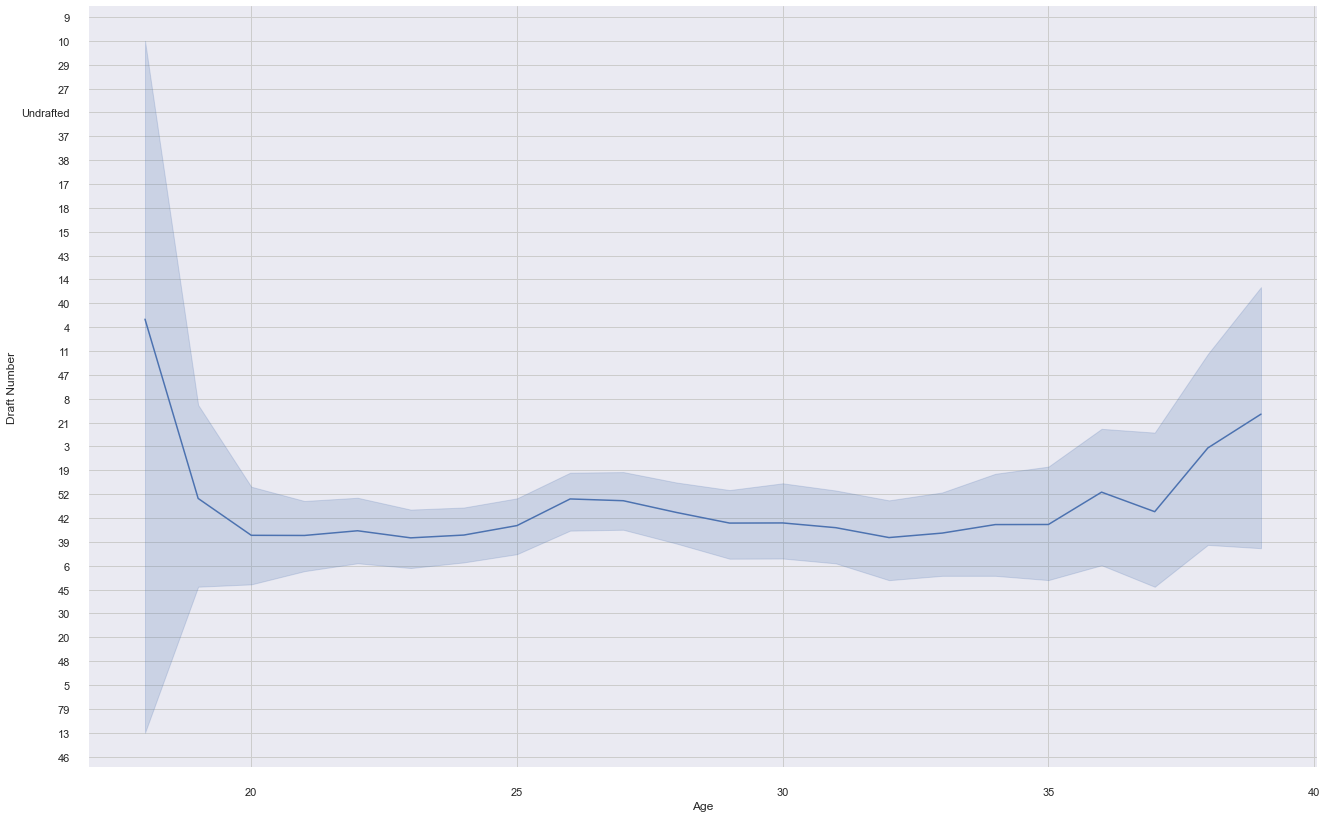

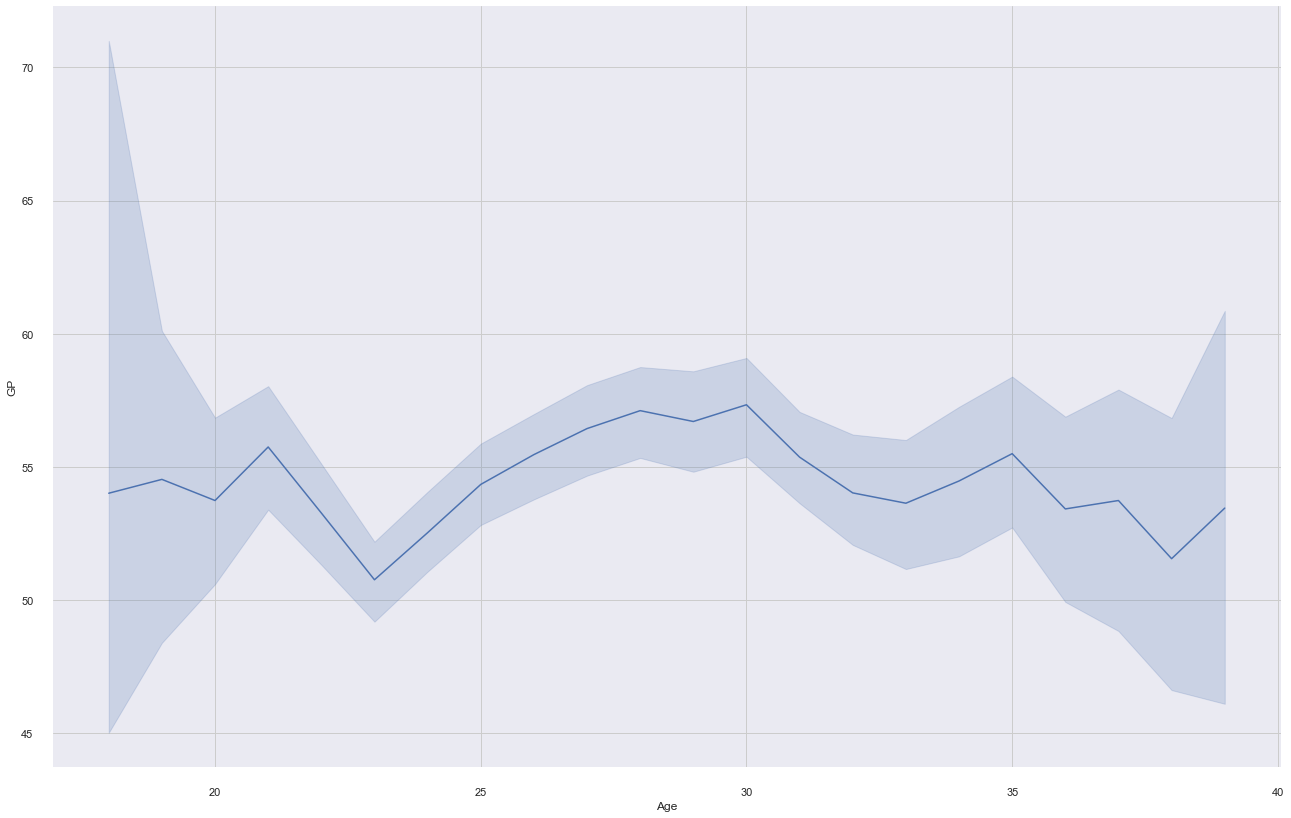

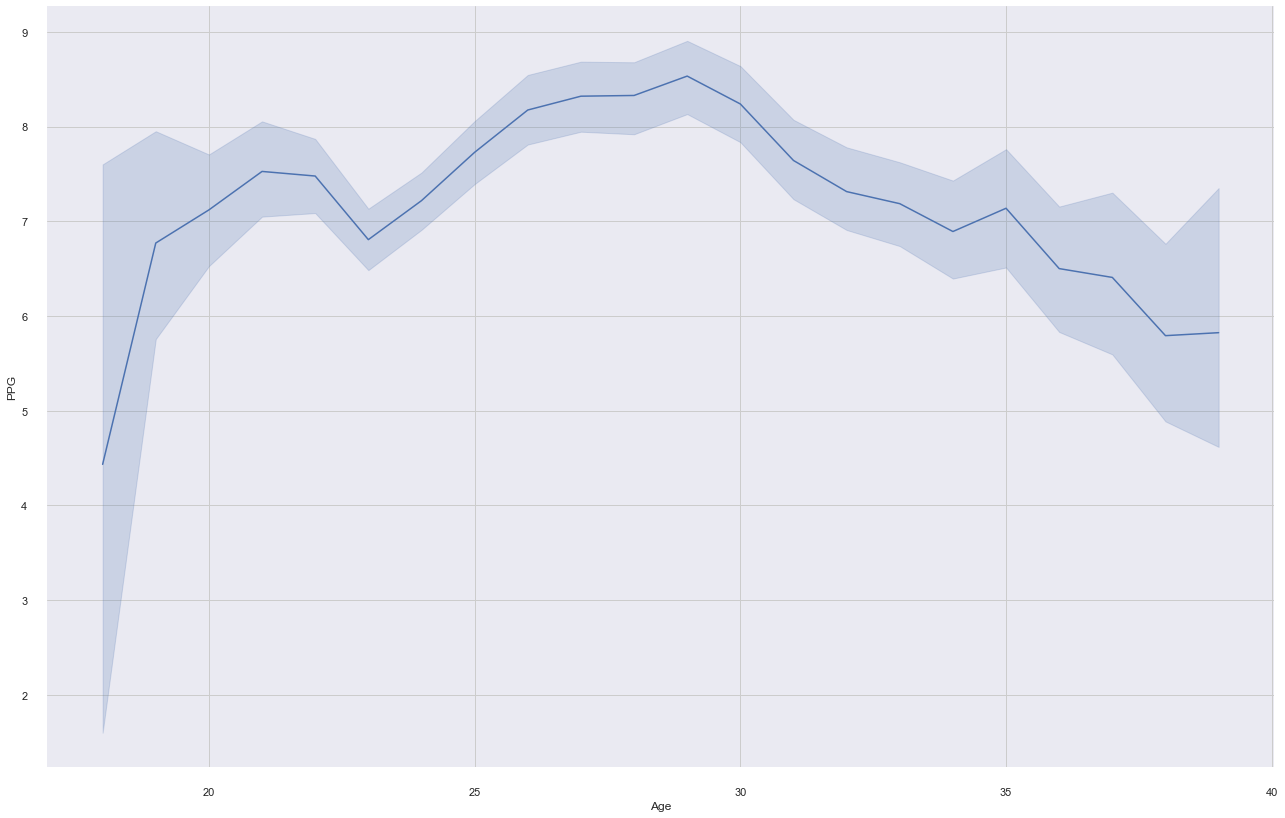

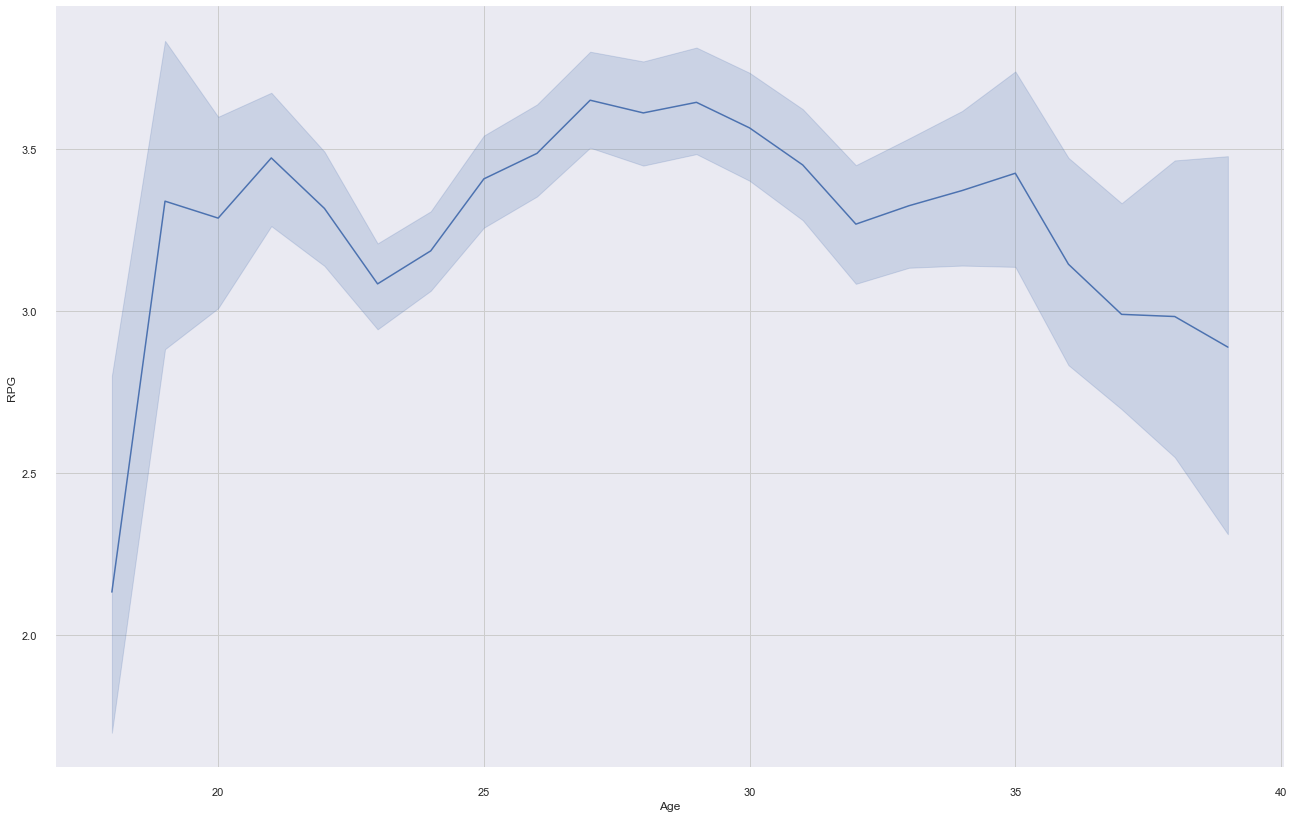

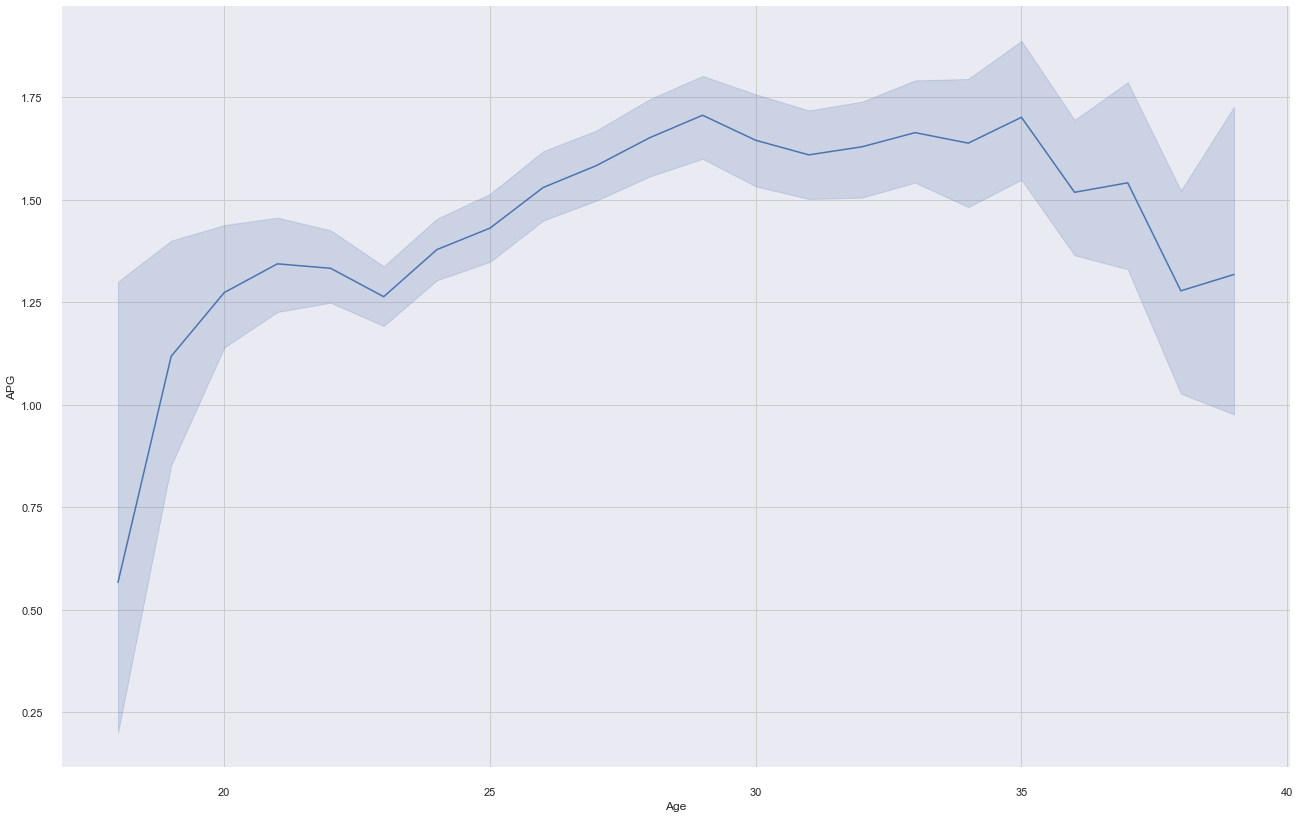

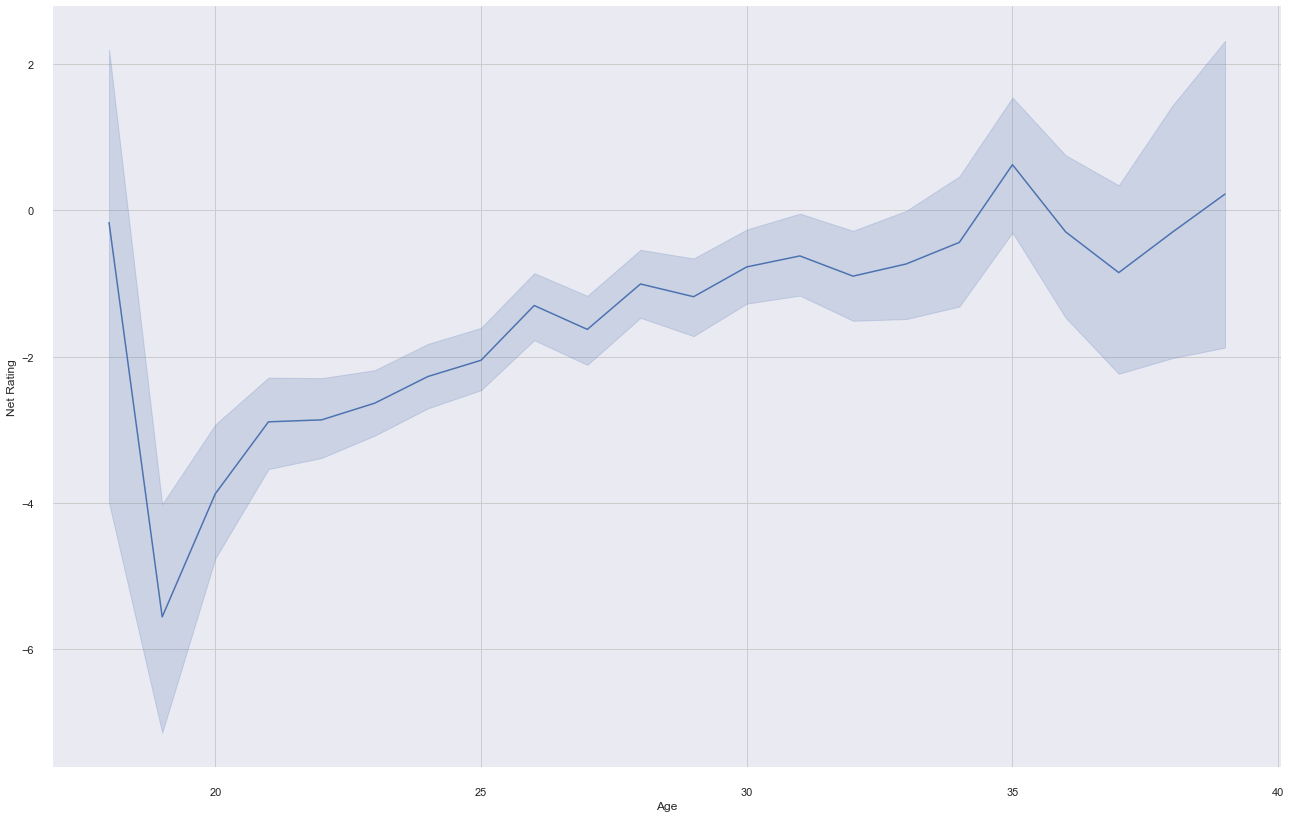

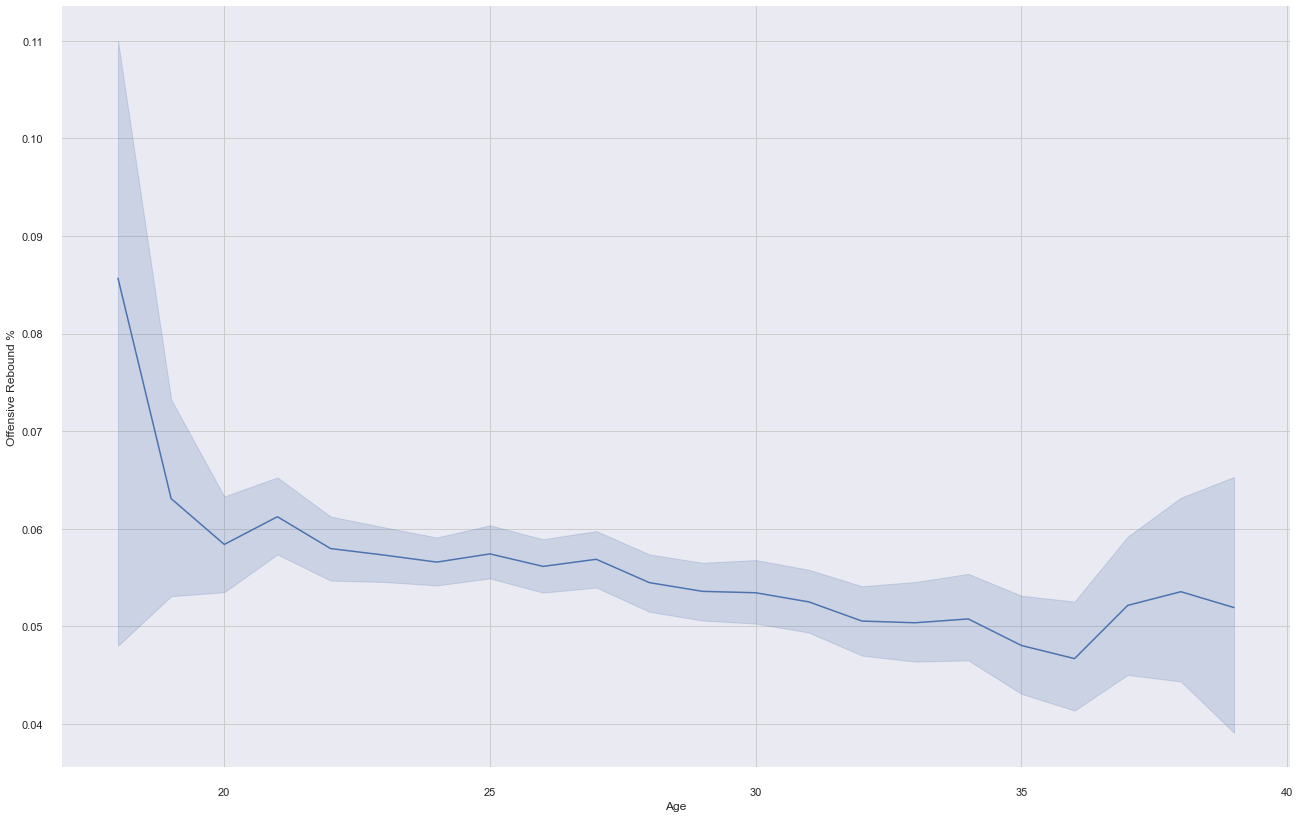

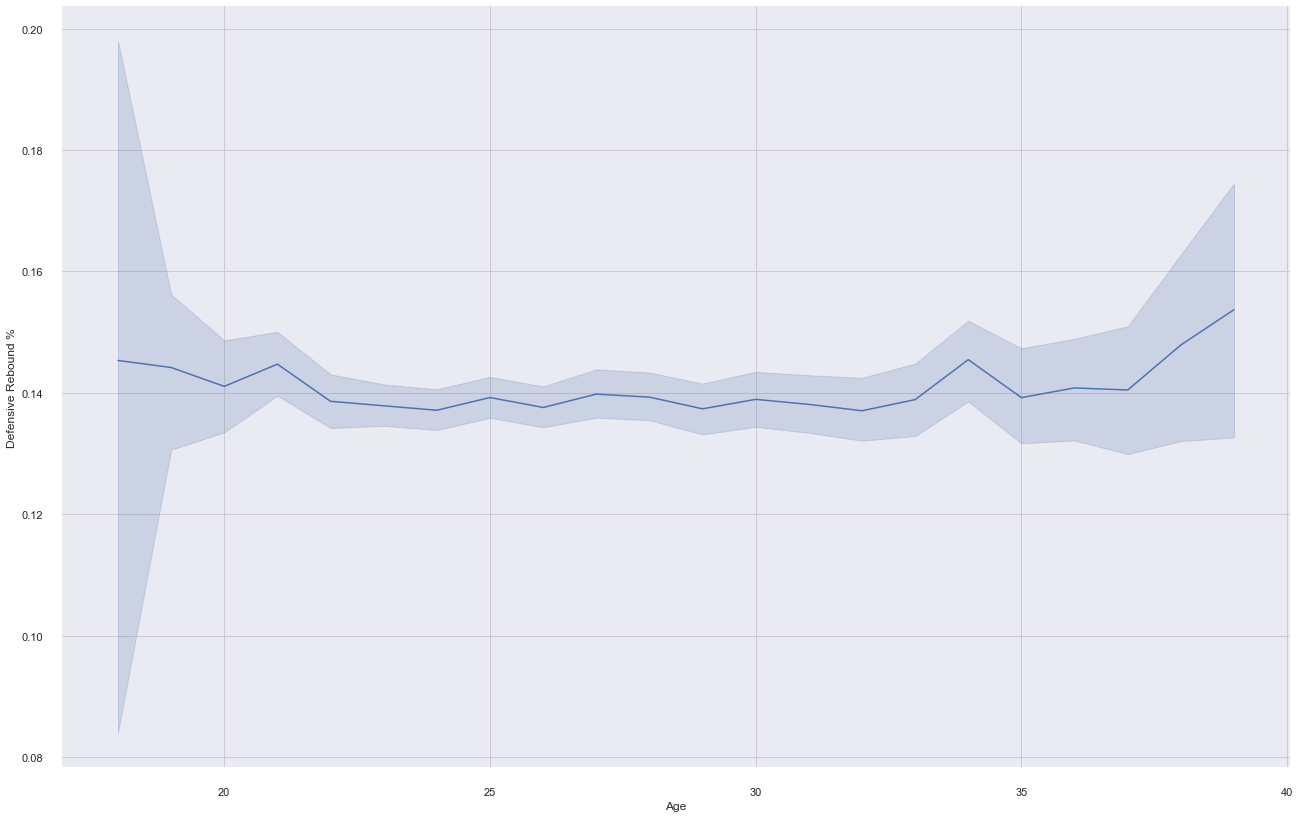

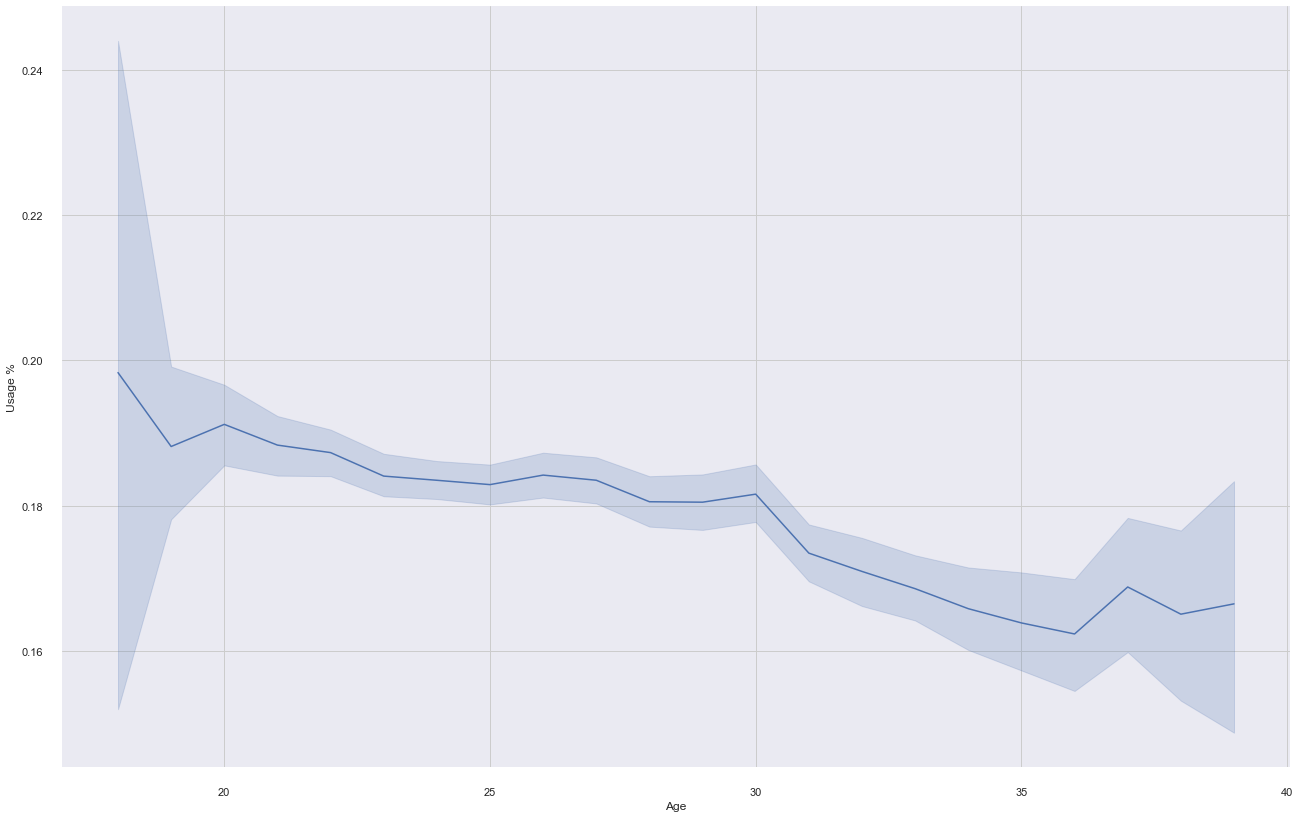

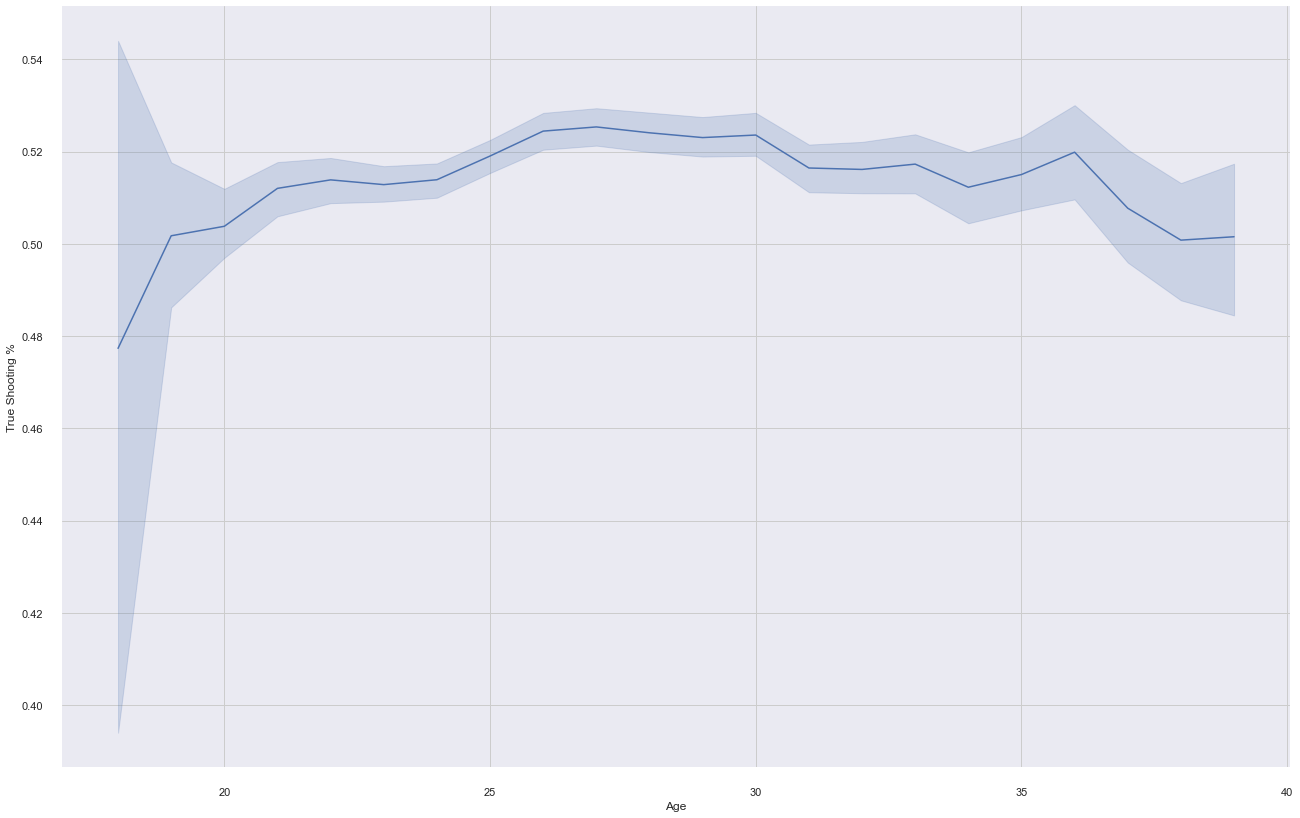

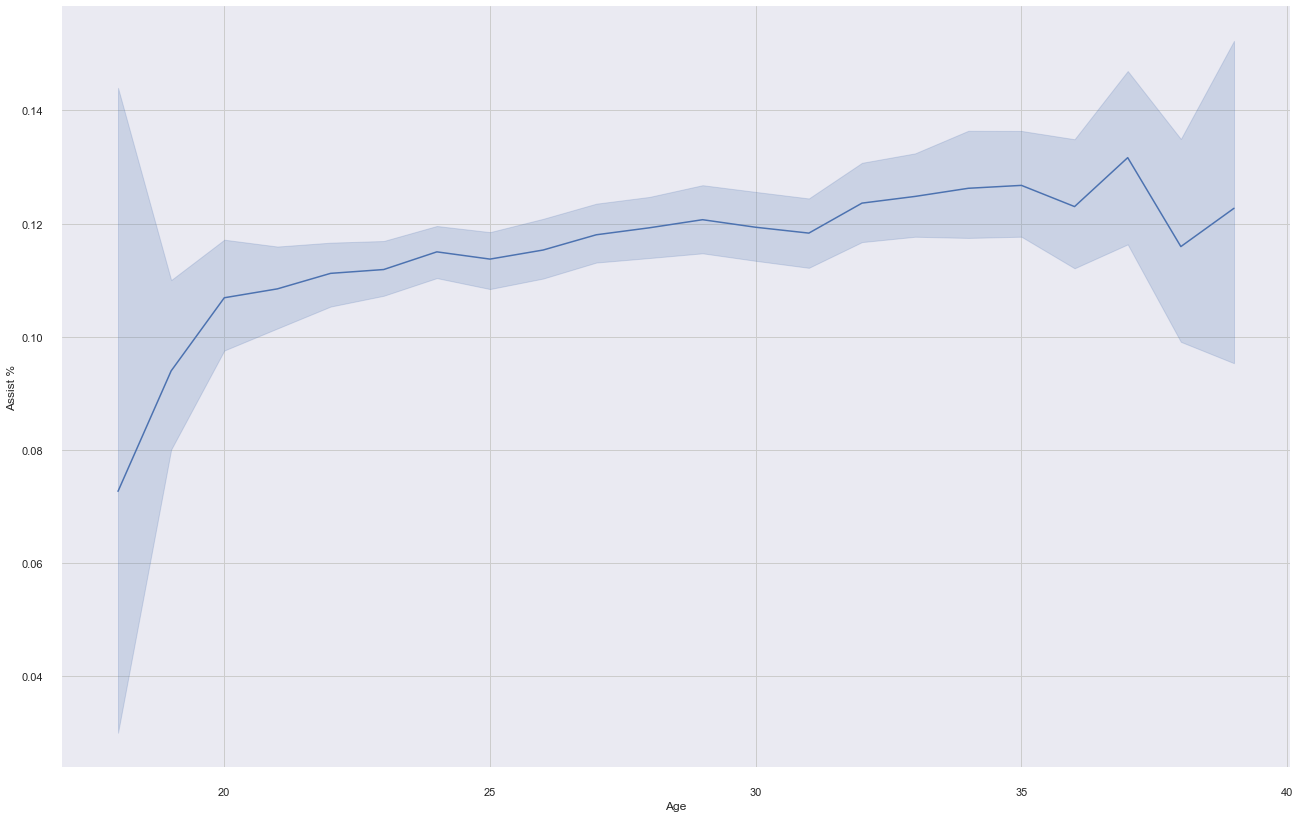

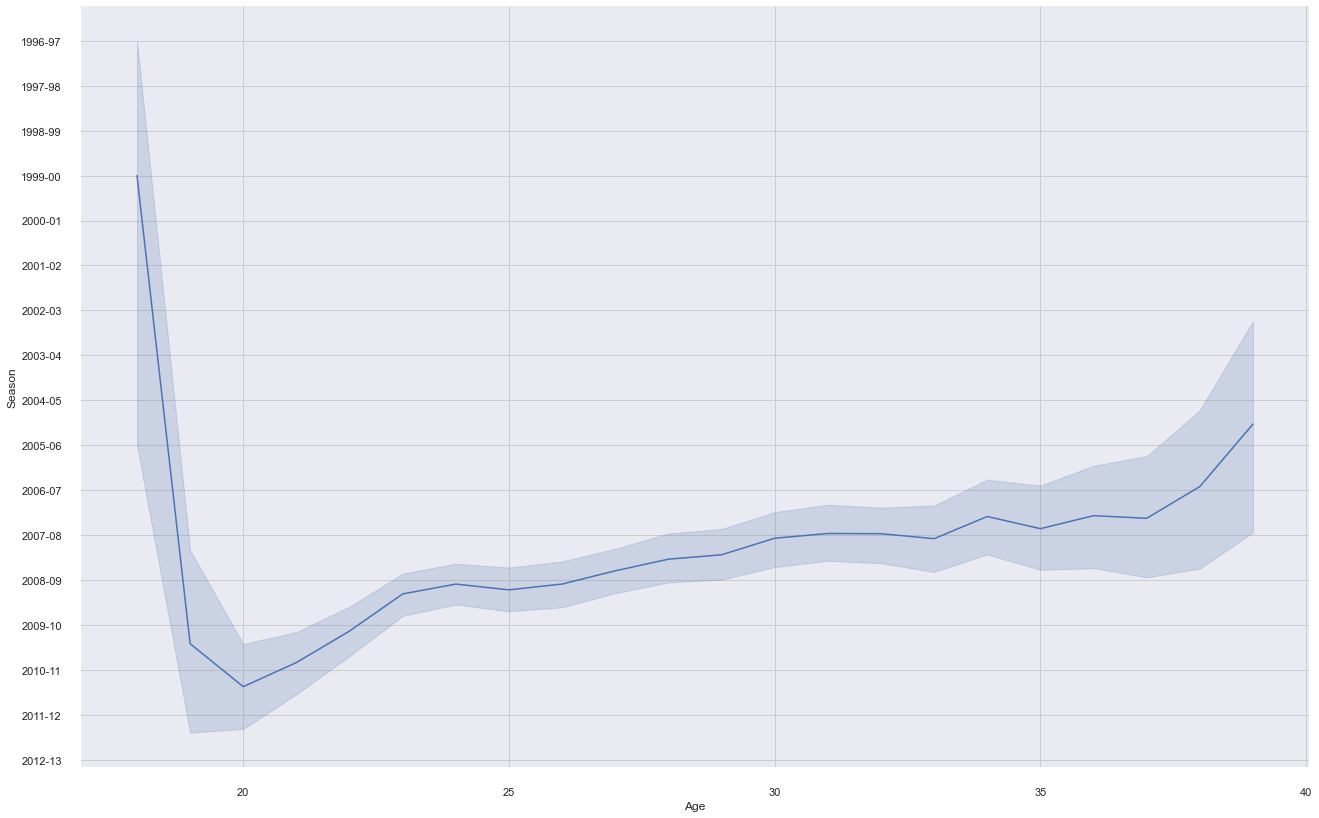

In [17]:
for column in no_outliers.columns[1:]:
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style='ticks')
    sns.lineplot(x='Age', y=column, data=no_outliers)
    sns.despine(offset=10, trim=True)
    fig.set_size_inches(22,14)

In [18]:
#The variable graphs per age still look similar after removing outliers

<ipython-input-19-62fdd646e15d>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  no_outliers_heatmap = sns.heatmap(corr_no_outliers, annot=True).set(Title='No Outliers Correlation Matrix')


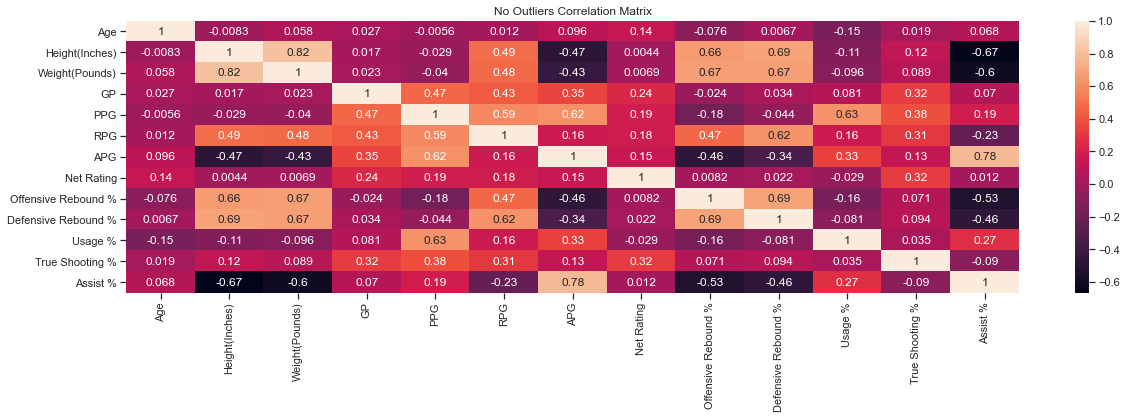

In [19]:
corr_no_outliers = no_outliers.corr()

no_outliers_heatmap = sns.heatmap(corr_no_outliers, annot=True).set(Title='No Outliers Correlation Matrix')

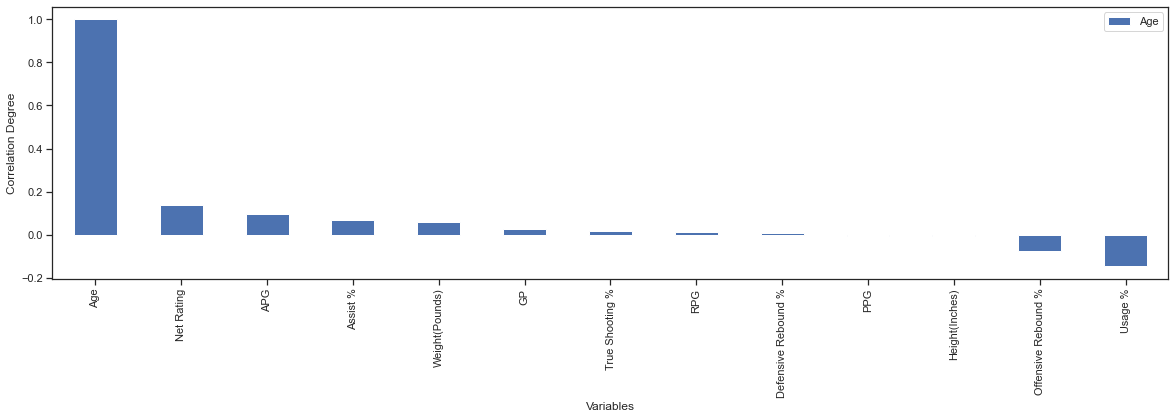

In [20]:
no_outliersdatasort = corr_no_outliers.sort_values('Age', ascending = False)

no_outliersdatasort[['Age']].plot(kind='bar', xlabel='Variables', ylabel='Correlation Degree')

plt.show() #Plotting the variables associated with age in descending order

In [21]:
#The correlation variables remain the same after filtering out outliers

In [ ]:
for column in nbaplayers.columns[1:]:
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style='ticks')
    sns.lineplot(x='Age', y=column, data=nbaplayers)
    sns.despine(offset=10, trim=True)
    fig.set_size_inches(22,14)

In [22]:
nbaplayers.mean() #calculating the mean for statistics in the dataset

Age                     27.168686
Height(Inches)          79.059937
Weight(Pounds)         221.869269
GP                      52.005832
PPG                      8.126487
RPG                      3.560036
APG                      1.801463
Net Rating              -2.153899
Offensive Rebound %      0.055593
Defensive Rebound %      0.141772
Usage %                  0.185599
True Shooting %          0.508099
Assist %                 0.131078
dtype: float64

In [23]:
nbaplayers.mode() #calculating the mode for statistics in the dataset

,Player,Team,Age,Height(Inches),Weight(Pounds),College,Country,Draft Year,Draft Round,Draft Number,...,PPG,RPG,APG,Net Rating,Offensive Rebound %,Defensive Rebound %,Usage %,True Shooting %,Assist %,Season
0,Vince Carter,CLE,24.0,81.0,220.0,None,USA,Undrafted,1,Undrafted,...,2.0,2.0,0.3,-0.3,0.0,0.0,0.183,0.0,0.0,2017-18
1,NaN,TOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
nbaplayers.median() #calculating the median for statistics in the dataset

Age                     27.000
Height(Inches)          79.000
Weight(Pounds)         220.000
GP                      58.000
PPG                      6.600
RPG                      3.000
APG                      1.200
Net Rating              -1.300
Offensive Rebound %      0.043
Defensive Rebound %      0.132
Usage %                  0.182
True Shooting %          0.521
Assist %                 0.102
dtype: float64

In [25]:
nbaplayers.min() #calculating the minimum for the dataset, looks like A.C. Green did not get much playing time

Player                 A.C. Green
Team                          ATL
Age                            18
Height(Inches)                 63
Weight(Pounds)                133
College                          
Country                    Angola
Draft Year                   1963
Draft Round                     1
Draft Number                    1
GP                              1
PPG                             0
RPG                             0
APG                             0
Net Rating                   -200
Offensive Rebound %             0
Defensive Rebound %             0
Usage %                         0
True Shooting %                 0
Assist %                        0
Season                    1996-97
dtype: object

In [26]:
nbaplayers.max() #This is the maximum entry

Player                 Zylan Cheatham
Team                              WAS
Age                                44
Height(Inches)                     91
Weight(Pounds)                    360
College                  Yonsei (KOR)
Country                    Yugoslavia
Draft Year                  Undrafted
Draft Round                 Undrafted
Draft Number                Undrafted
GP                                 85
PPG                              36.1
RPG                              16.3
APG                              11.7
Net Rating                        300
Offensive Rebound %                 1
Defensive Rebound %                 1
Usage %                             1
True Shooting %                   1.5
Assist %                            1
Season                        2019-20
dtype: object

In [27]:
nbaplayers.count() #there are 11,145 entries in the dataset

Player                 11145
Team                   11145
Age                    11145
Height(Inches)         11145
Weight(Pounds)         11145
College                11145
Country                11145
Draft Year             11145
Draft Round            11145
Draft Number           11145
GP                     11145
PPG                    11145
RPG                    11145
APG                    11145
Net Rating             11145
Offensive Rebound %    11145
Defensive Rebound %    11145
Usage %                11145
True Shooting %        11145
Assist %               11145
Season                 11145
dtype: int64

In [28]:
nbaplayers.std() #the standard deviation of the dataset

Age                     4.344164
Height(Inches)          3.618544
Weight(Pounds)         27.725643
GP                     25.069495
PPG                     5.935482
RPG                     2.495394
APG                     1.789940
Net Rating             12.150611
Offensive Rebound %     0.043889
Defensive Rebound %     0.063194
Usage %                 0.053047
True Shooting %         0.098879
Assist %                0.095017
dtype: float64

In [29]:
counts = nbaplayers['Age'].value_counts()
print(counts) #inspecting the value counts by age for outliers, there are not many entries for 19 and under and 38 and older

24    1143
23    1039
25    1025
26     933
27     891
28     774
29     718
22     678
30     654
31     581
32     502
21     425
33     424
34     329
20     246
35     232
36     180
37     126
38      83
19      67
39      51
40      27
41       7
18       3
42       3
43       3
44       1
Name: Age, dtype: int64


In [56]:

f1 = nbaplayers.loc[nbaplayers['Age'] > 19]
f2 = nbaplayers.loc[nbaplayers['Age'] < 38]
nbaplayersagefilter = nbaplayers[f1 | f2]
#In the NBA, players under 20 are not ready for the league often times and do not contribute.
#Players also do not age well and usually only the best ones play in their late 30s and early 40s which likely explains the outliers

sns.relplot(x="Age", y="APG", kind="line", ci="sd", data=nbaplayersagefilter)
sns.relplot(x="Age", y="Offensive Rebound %", kind="line", ci="sd", data=nbaplayersagefilter)
sns.relplot(x="Age", y="Net Rating", kind="line", ci="sd", data=nbaplayersagefilter)
sns.relplot(x="Age", y="Usage %", kind="line", ci="sd", data=nbaplayersagefilter)

TypeError: unsupported operand type(s) for |: 'float' and 'float'

In [31]:
#From observing the graphs, APG starts to decline around age 29
#Offensive Rebound % tends to start declining at age 24 but drastically after age 29
#Net Rating gradually declines after age 35 and plummets at 41
#Usage % starts to decline at age 31, with dramatic declines gain and ages 35 and 39
#Offensive Rebound %, Net Rating, and Usage % increase dramatically after age 42 and I suspect that is because...
#the only players remaining at that age are highly productive ones

In [39]:
print(nbaplayersagefilter.min())

Player                 A.C. Green
Team                          ATL
Age                            20
Height(Inches)                 63
Weight(Pounds)                133
College                          
Country                    Angola
Draft Year                   1963
Draft Round                     1
Draft Number                    1
GP                              1
PPG                             0
RPG                             0
APG                             0
Net Rating                   -200
Offensive Rebound %             0
Defensive Rebound %             0
Usage %                         0
True Shooting %                 0
Assist %                        0
Season                    1996-97
dtype: object


In [67]:
dependent = nbaplayers['Age']
independent = nbaplayers.iloc[:,10:20]
independent = sm.add_constant(independent)
regression_model = sm.OLS(dependent,independent).fit()

print(regression_model.summary())
#Linear regression is run here to see if there are any other relationships between age and game statistic variables

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     58.47
Date:                Sat, 19 Jun 2021   Prob (F-statistic):          4.63e-116
Time:                        10:48:34   Log-Likelihood:                -31899.
No. Observations:               11145   AIC:                         6.382e+04
Df Residuals:                   11134   BIC:                         6.390e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  29.2938    

In [ ]:
#After running linear regression for game statistics, a low r square is yielded and the 4 values identified in the...
#correlation matrix have p-values less than 0.05

In [73]:
dependent = nbaplayers['Net Rating']
independent = nbaplayers.iloc[:,10:20]
independent = sm.add_constant(independent)
regression_model = sm.OLS(dependent,independent).fit()

print(regression_model.summary())
#Linear regression is run here to see if there are any other relationships between age and game statistic variables

                            OLS Regression Results                            
Dep. Variable:             Net Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.222e+31
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:25:53   Log-Likelihood:             3.2521e+05
No. Observations:               11145   AIC:                        -6.504e+05
Df Residuals:                   11134   BIC:                        -6.503e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.331e-14   3